In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train_processed.csv')
test = pd.read_csv('test_processed.csv')
data.drop("index",axis=1, inplace = True)
test.drop("index",axis=1, inplace = True)
data

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,...,wr_10,wr_11,wr_12,wr_13,Mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op
0,3,1,0,4,0,0,3,6,10,0,...,1,0,1,1,2.95,3.0,3.484417,4.5,2.0,4.0
1,2,3,1,3,0,0,1,1,7,2,...,1,0,1,1,2.60,4.0,2.500000,5.5,3.5,5.0
2,3,2,0,3,1,0,2,6,10,1,...,1,0,1,1,1.90,4.5,4.000000,6.0,5.5,3.5
3,2,3,1,0,0,0,1,1,7,2,...,1,0,1,1,3.35,4.0,5.000000,4.5,3.5,4.5
4,2,2,0,2,1,0,2,6,0,0,...,1,1,1,1,3.00,4.0,4.000000,6.0,5.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45524,1,1,0,1,0,2,1,6,8,2,...,1,0,1,1,4.15,6.0,3.000000,0.5,1.0,4.5
45525,3,1,0,2,1,0,1,6,1,0,...,1,0,1,1,3.80,4.0,3.000000,4.5,4.5,5.5
45526,1,1,0,1,0,0,1,6,5,1,...,1,0,1,1,1.50,2.0,5.500000,3.5,5.0,6.5
45527,4,3,0,2,1,2,1,6,1,1,...,1,0,1,1,2.90,3.5,3.000000,4.5,4.5,5.5


In [4]:
for i in range(0, 27):
    data.iloc[:,i] = data.iloc[:,i].astype('str')
data['familysize'] = data['familysize'].astype('float')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45529 entries, 0 to 45528
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_group   45529 non-null  object 
 1   education   45529 non-null  object 
 2   engnat      45529 non-null  object 
 3   familysize  45529 non-null  float64
 4   gender      45529 non-null  object 
 5   hand        45529 non-null  object 
 6   married     45529 non-null  object 
 7   race        45529 non-null  object 
 8   religion    45529 non-null  object 
 9   urban       45529 non-null  object 
 10  voted       45529 non-null  object 
 11  wf_01       45529 non-null  object 
 12  wf_02       45529 non-null  object 
 13  wf_03       45529 non-null  object 
 14  wr_01       45529 non-null  object 
 15  wr_02       45529 non-null  object 
 16  wr_03       45529 non-null  object 
 17  wr_04       45529 non-null  object 
 18  wr_05       45529 non-null  object 
 19  wr_06       45529 non-nul

In [7]:
data.describe()

,familysize,Mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op
count,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000
mean,2.597356,3.352500,3.225169,3.798207,4.374656,3.882124,4.998415
std,1.509348,0.794678,1.749369,1.449343,1.509251,1.678350,1.227331
min,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000
25%,2.000000,2.750000,1.500000,3.000000,3.500000,2.500000,4.000000
50%,2.000000,3.350000,3.000000,4.000000,4.500000,4.000000,5.000000
75%,3.000000,3.950000,4.500000,5.000000,5.500000,5.500000,6.000000
max,44.000000,5.000000,6.500000,6.500000,6.500000,6.500000,6.500000


#### 변수 설명 
<독립변수>  
> 범주형
- age_group : 연령
- education : 교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)
- engnat : 모국어가 영어인지에 대한 여부 (1=Yes, 2=No, 0=무응답)
- familysize : 형제자매 수
- gender : 성별 (Male, Female)
- hand : 필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)
- married : 혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)
- race : 인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other)
- religion : 종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other)							
- urban : 유년기의 거주 구역 (1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)
- wr_(01~13) : 실존하는 해당 단어의 정의을 아는 지에 대한 여부 (1=Yes, 0=No)
- wf_(01~03) : 허구인 단어의 정의를 아는 지에 대한 여부 (1=Yes, 0=No)

> 수치형
- tp__ : 기존의 tp 변수를 통해 성향 변수 생성
- MaMach_score : 기존의 Q_A 변수를 통해 점수화

<종속변수>
- voted (타겟): 지난 해 국가 선거 투표 여부 (0=No, 1=Yes)

---

### 투표 유무에 관한 분포

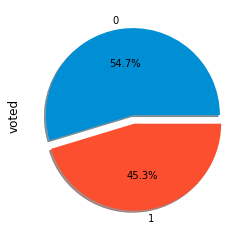

In [8]:
data['voted'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

주어진 데이터에서 투표 유무는 동률에 가깝지만, 투표에 참가하지 않은 인원이 더 우세하다.

### 나이대 분포

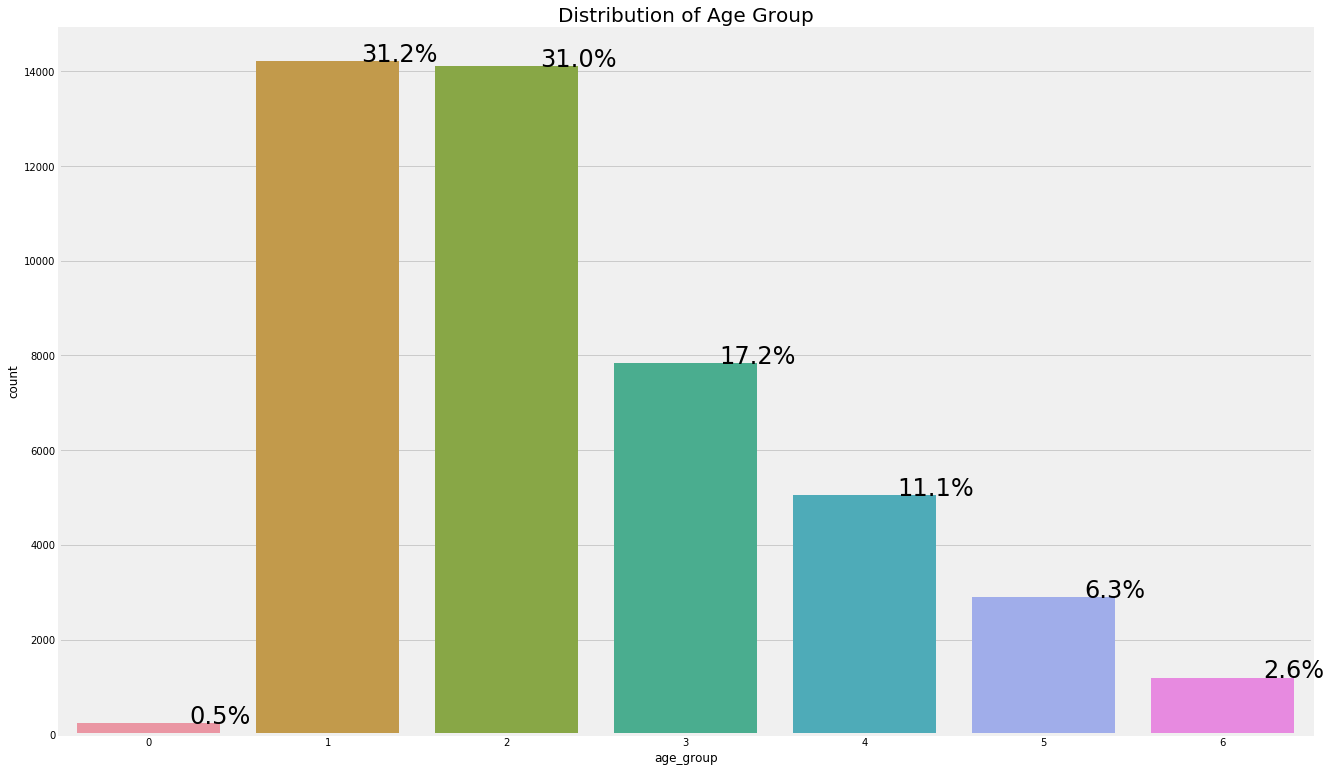

In [8]:
plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(data['age_group'])
plt.title('Distribution of Age Group', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.savefig("age_distribution.png")

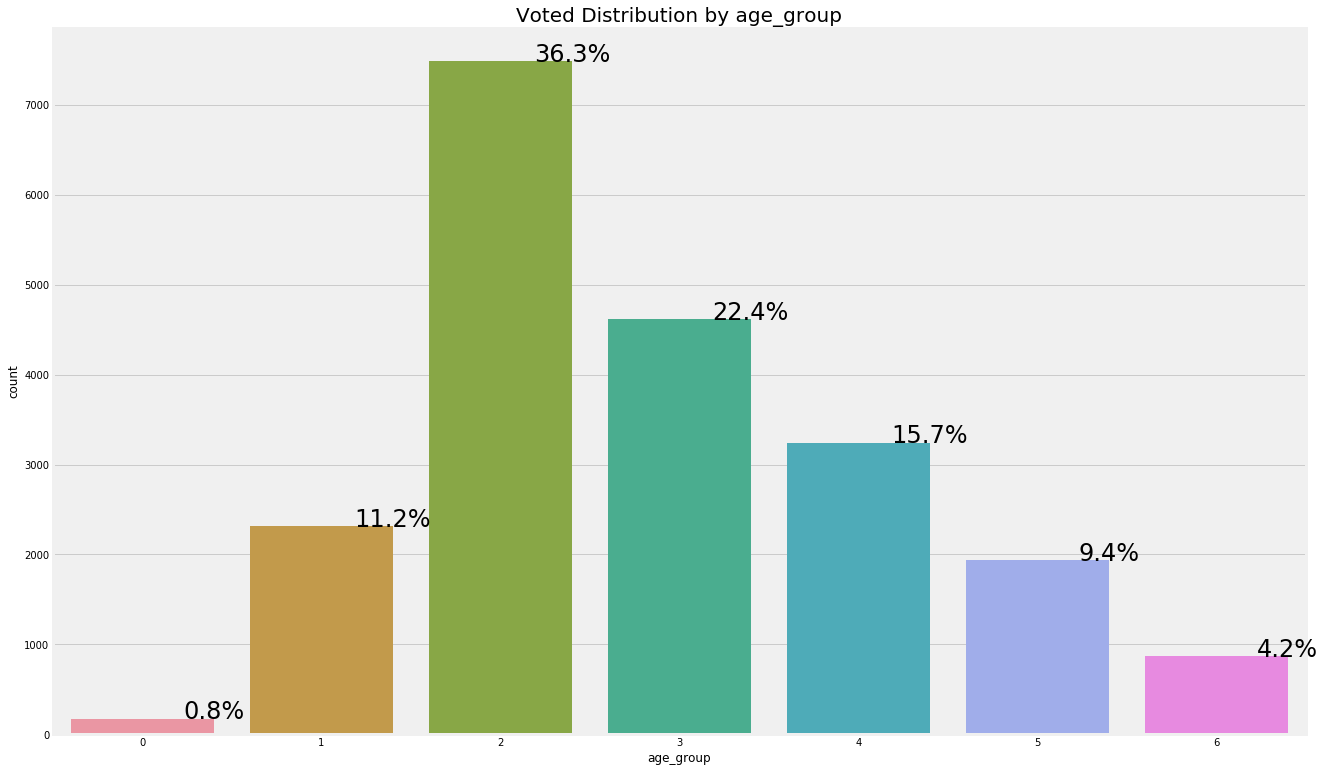

In [9]:
yes_v = data[data['voted']=="1"]

plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(yes_v['age_group'])
plt.title('Voted Distribution by age_group', fontsize = 20)

total = float(len(yes_v))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.savefig("voted_age_yes.png")

2-30대(label = 1, 2)가 주어진 데이터의 절반 이상을 차지한다.

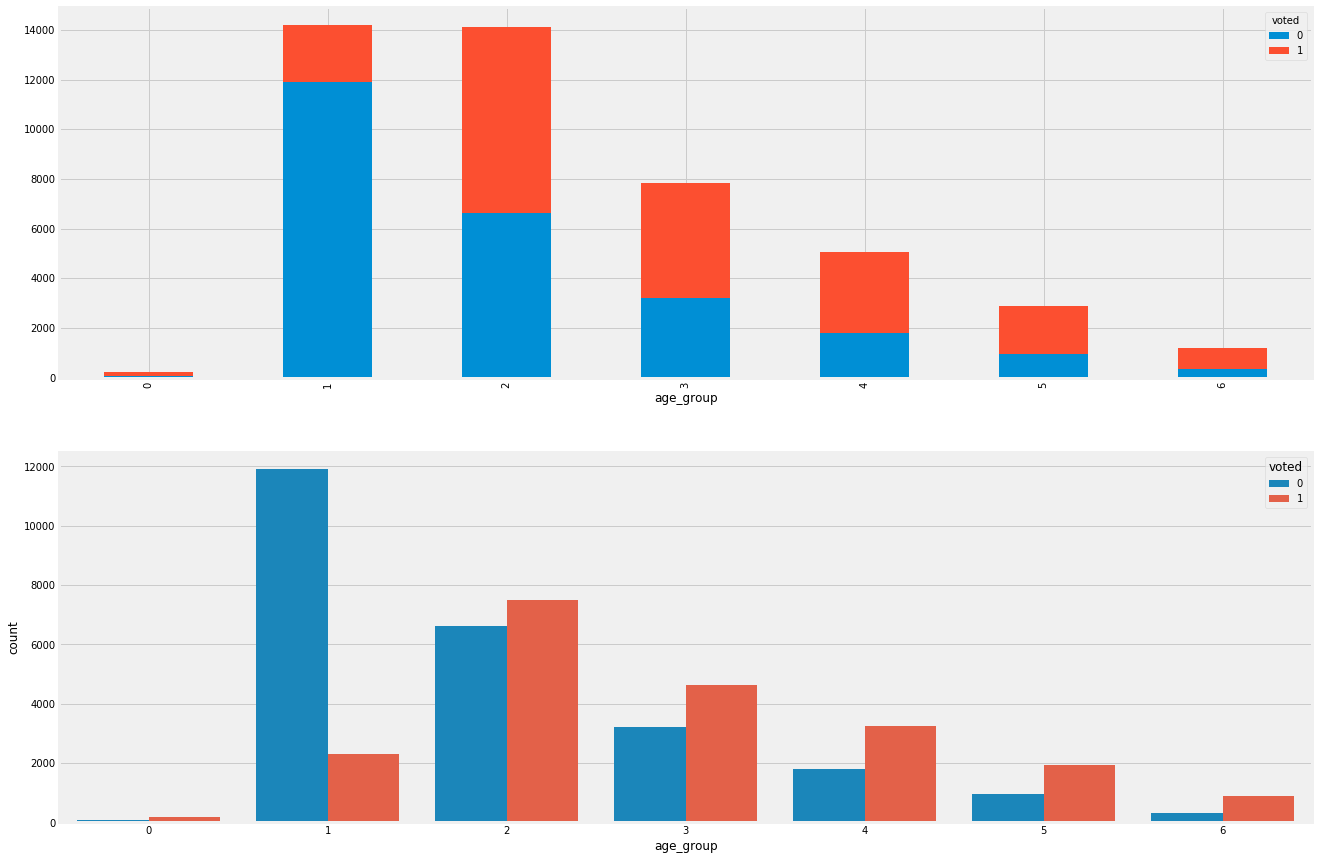

In [10]:
df_plot = data.groupby(['voted', 'age_group']).size().reset_index().pivot(columns='voted', index='age_group', values=0)


f,ax=plt.subplots(2,1,figsize=(20, 15))  #plot field
df_plot.plot(kind='bar', stacked=True, ax=ax[0])
sns.countplot('age_group',hue='voted',data=data, ax=ax[1])

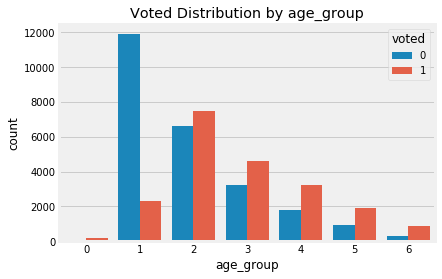

In [6]:
sns.countplot('age_group',hue='voted',data=data)
plt.title('Voted Distribution by age_group')  
plt.savefig("voted_age.png")

- 10대의 경우 투표율 자체가 극도로 적다.
- 가장 인구 수가 많았던 20대의 경우 투표하지 않은 인원이 투표한 인원에 비해 약 6배 많다. 
- 20대를 제외한 모든 연령대에서 투표에 참가한 인원이 투표에 참가하지 않은 인원보다 많다.

### 교육수준 분포

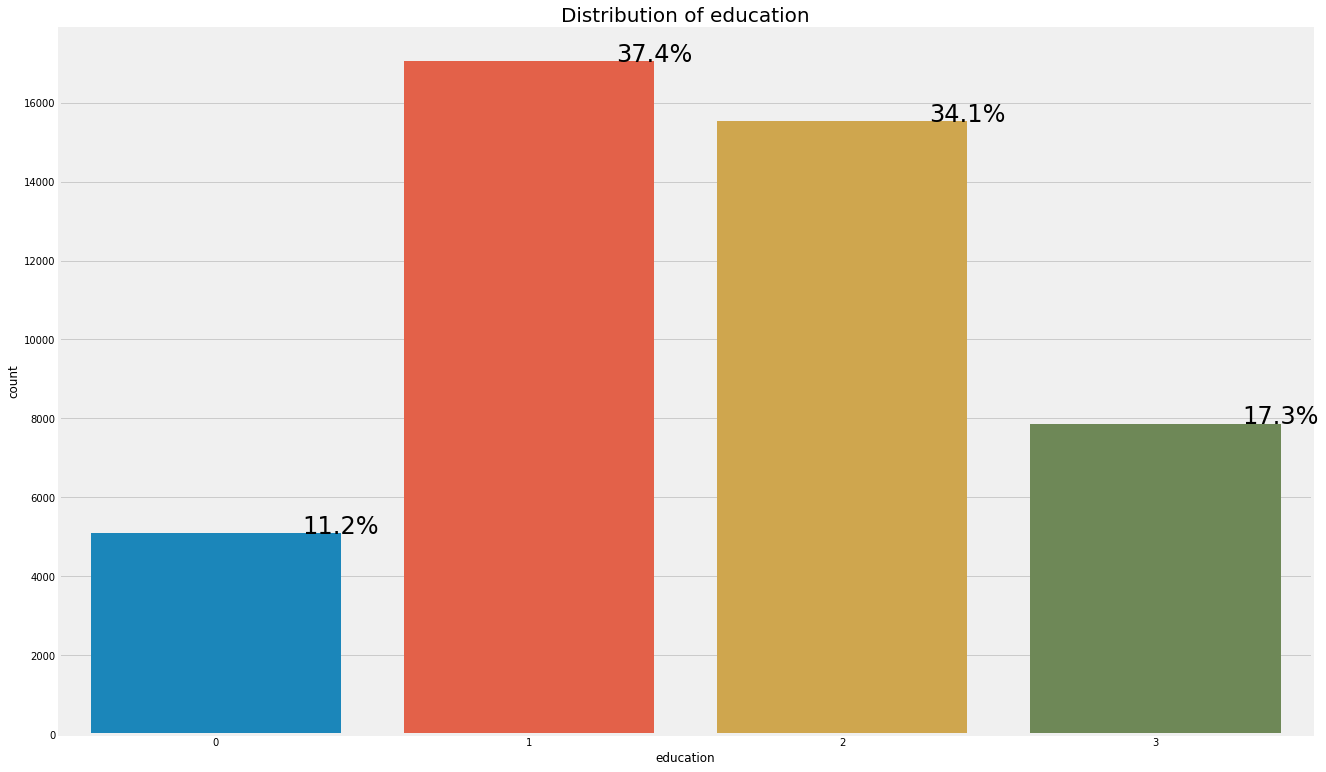

In [11]:
plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(data['education'])
plt.title('Distribution of education', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.show()

- 고등학생, 대학생, 석박사 순으로 분포
- 미국은 17세 이후 선거 가능

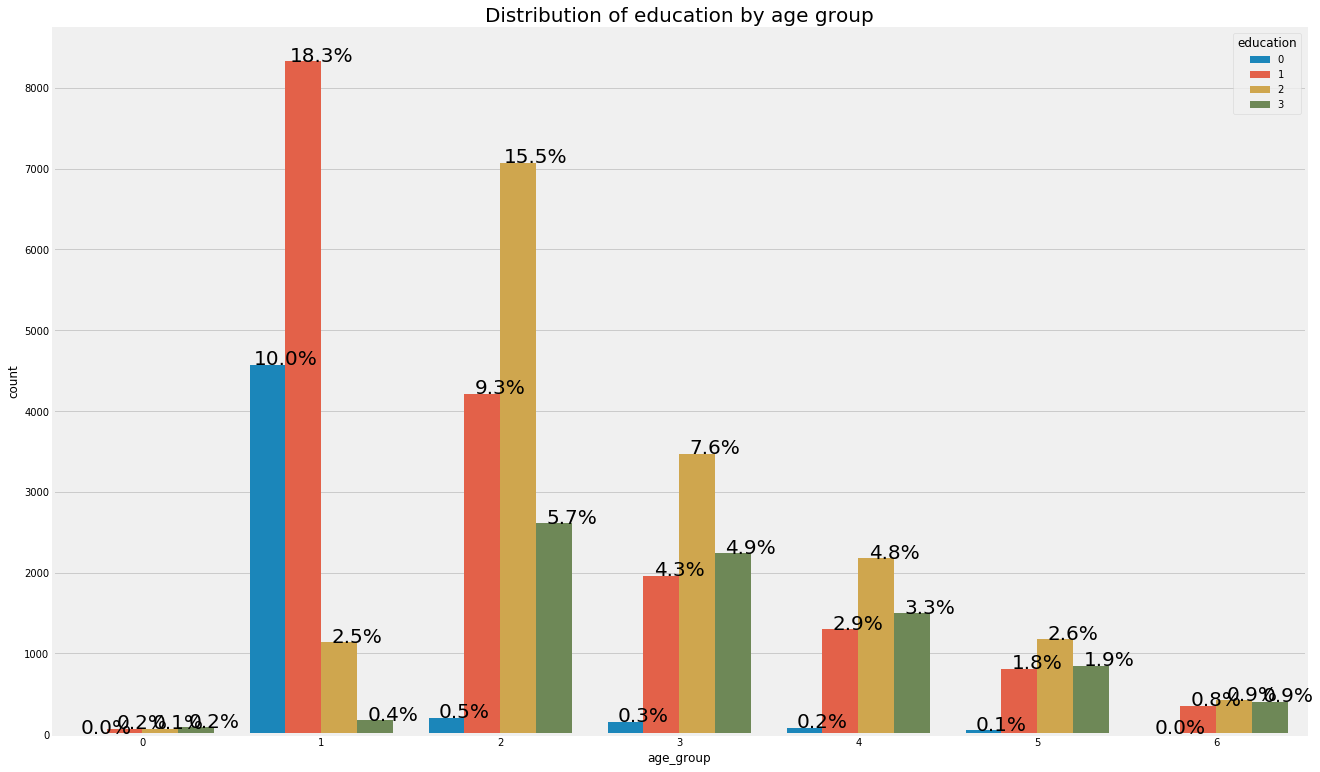

In [12]:
ax = sns.countplot('age_group',hue='education',data=data)
plt.title('Distribution of education by age group', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 20)
plt.show()

- age_group 변수의 label = 1일 때, less than high school에 해당하는 데이터의 비중이 높다. >> 애초에 선거 가능 후보가 아닐 확률이 높다.

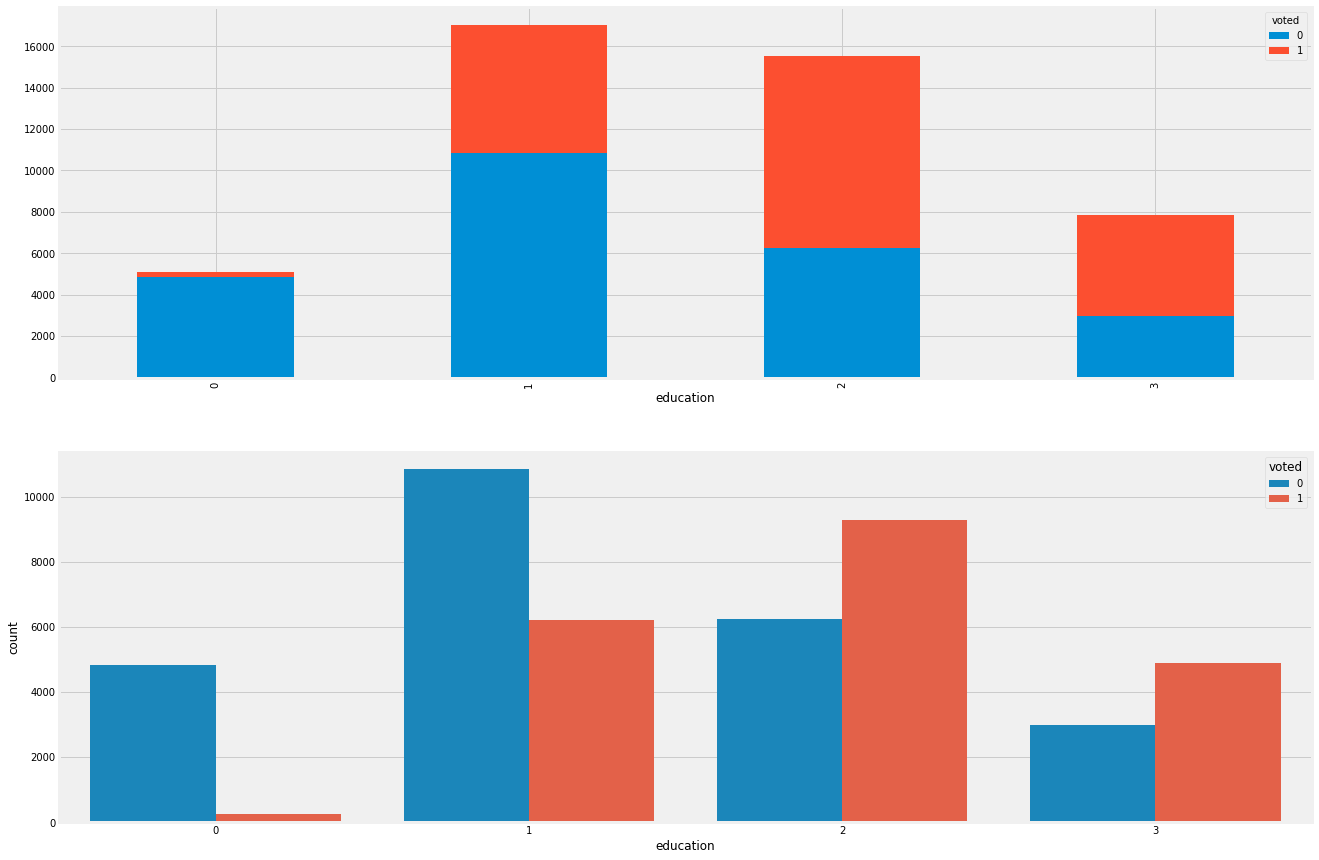

In [13]:
df_plot = data.groupby(['voted', 'education']).size().reset_index().pivot(columns='voted', index='education', values=0)


f,ax=plt.subplots(2,1,figsize=(20, 15))  #plot field
df_plot.plot(kind='bar', stacked=True, ax=ax[0])
sns.countplot('education',hue='voted',data=data, ax=ax[1])

- 고학력자로 갈 수록 투표율이 증가하였다. 
- age_group 변수가 실제 나이가 아닌 그룹화된 변수임을 감안해 label = 0, 1일 때 법적 선거 가능 나이가 아닌 데이터가 포함되었을 경우를 감안하여야 한다. >> married와 단어 변수로 가려낼 수는 없을까?

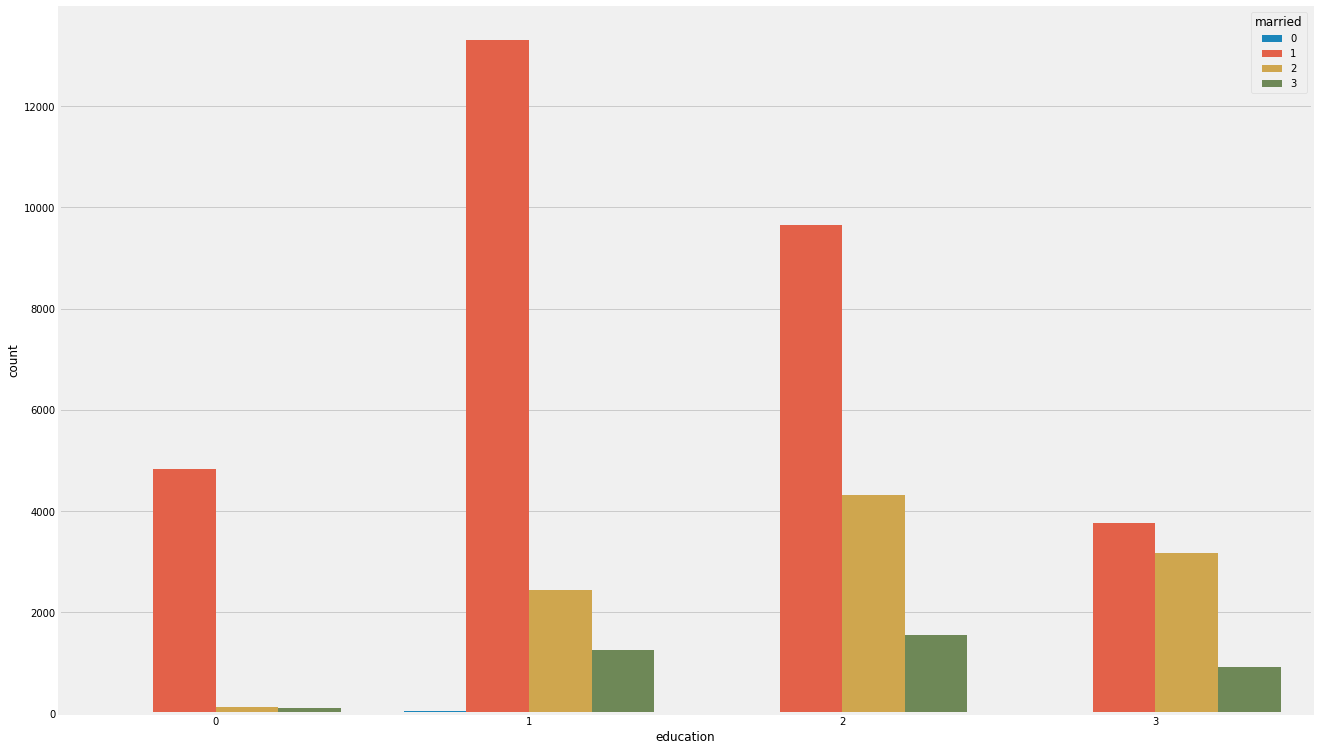

In [14]:
sns.countplot('education',hue='married',data=data)

**married = 0은 결측치**라고 함. >> 수정 필요

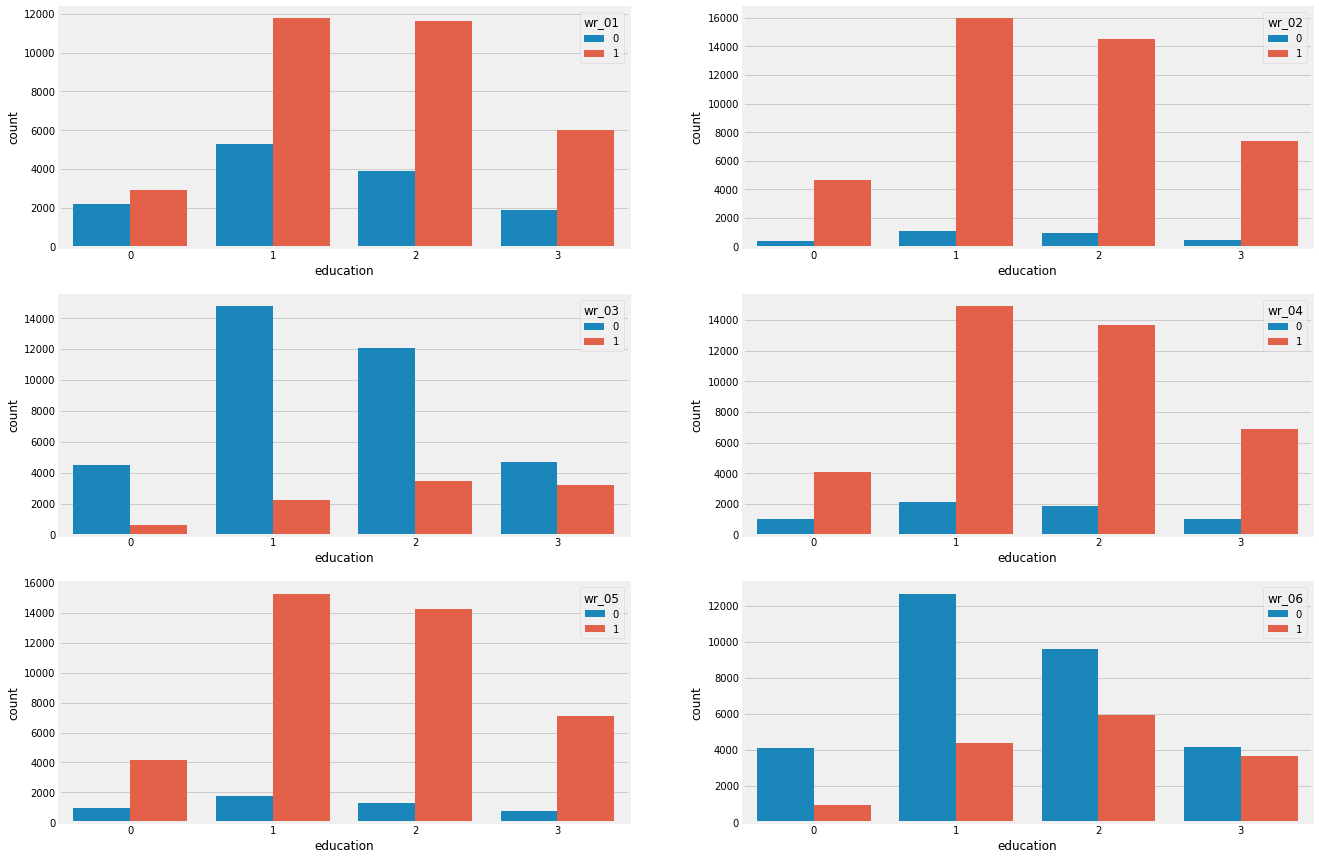

In [15]:
#wr01 ~ 06
f,ax=plt.subplots(3,2,figsize=(20, 15))  #plot field

sns.countplot('education',hue='wr_01',data=data, ax=ax[0, 0])
sns.countplot('education',hue='wr_02',data=data, ax=ax[0, 1])
sns.countplot('education',hue='wr_03',data=data, ax=ax[1, 0])
sns.countplot('education',hue='wr_04',data=data, ax=ax[1, 1])
sns.countplot('education',hue='wr_05',data=data, ax=ax[2, 0])
sns.countplot('education',hue='wr_06',data=data, ax=ax[2, 1])

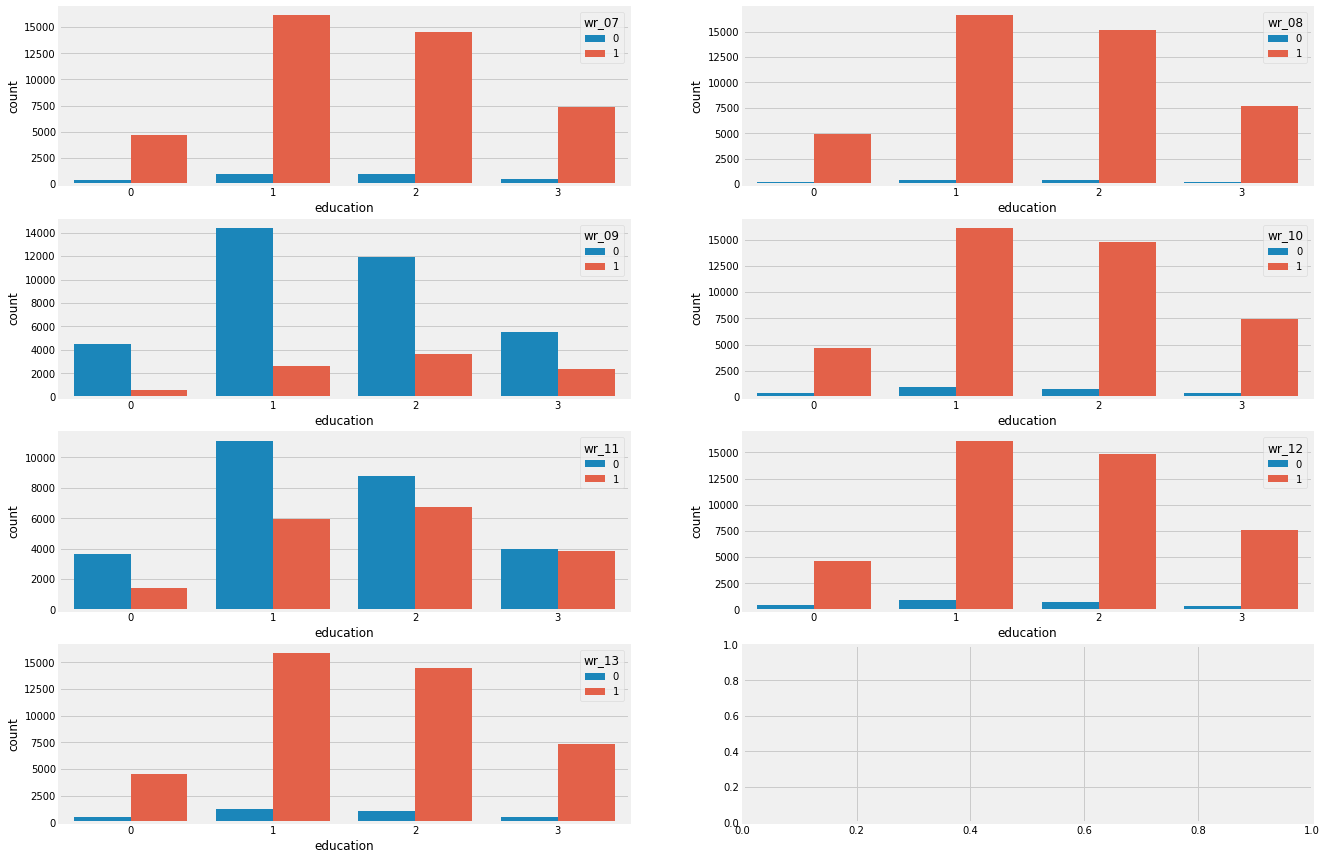

In [16]:
#wr07 ~ 13
f,ax=plt.subplots(4,2,figsize=(20, 15))  #plot field

sns.countplot('education',hue='wr_07',data=data, ax=ax[0, 0])
sns.countplot('education',hue='wr_08',data=data, ax=ax[0, 1])
sns.countplot('education',hue='wr_09',data=data, ax=ax[1, 0])
sns.countplot('education',hue='wr_10',data=data, ax=ax[1, 1])
sns.countplot('education',hue='wr_11',data=data, ax=ax[2, 0])
sns.countplot('education',hue='wr_12',data=data, ax=ax[2, 1])
sns.countplot('education',hue='wr_13',data=data, ax=ax[3, 0])

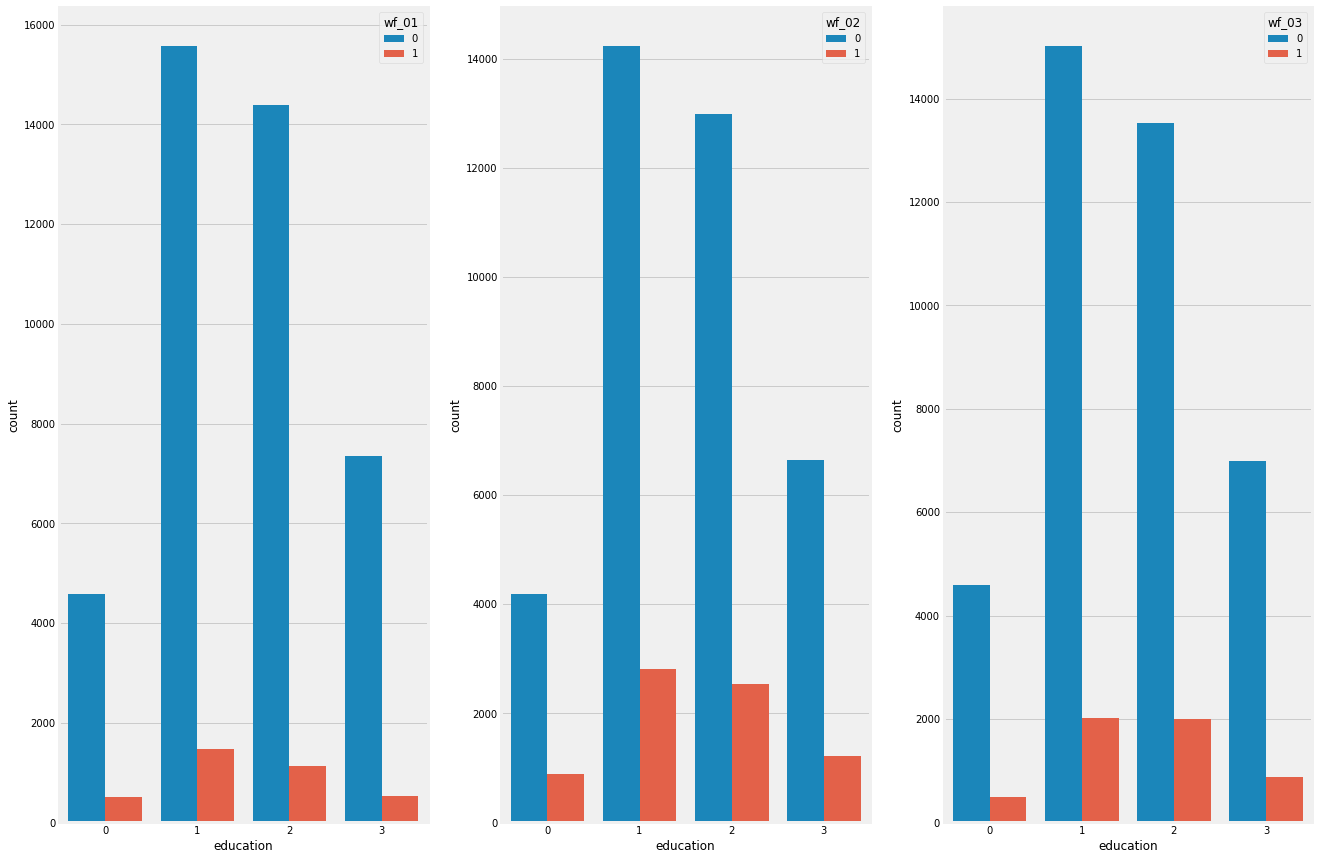

In [17]:
#wf01 ~ 03
f,ax=plt.subplots(1, 3,figsize=(20, 15))  #plot field

sns.countplot('education',hue='wf_01',data=data, ax=ax[0])
sns.countplot('education',hue='wf_02',data=data, ax=ax[1])
sns.countplot('education',hue='wf_03',data=data, ax=ax[2])

### 모국어가 영어인지에 대한 분포

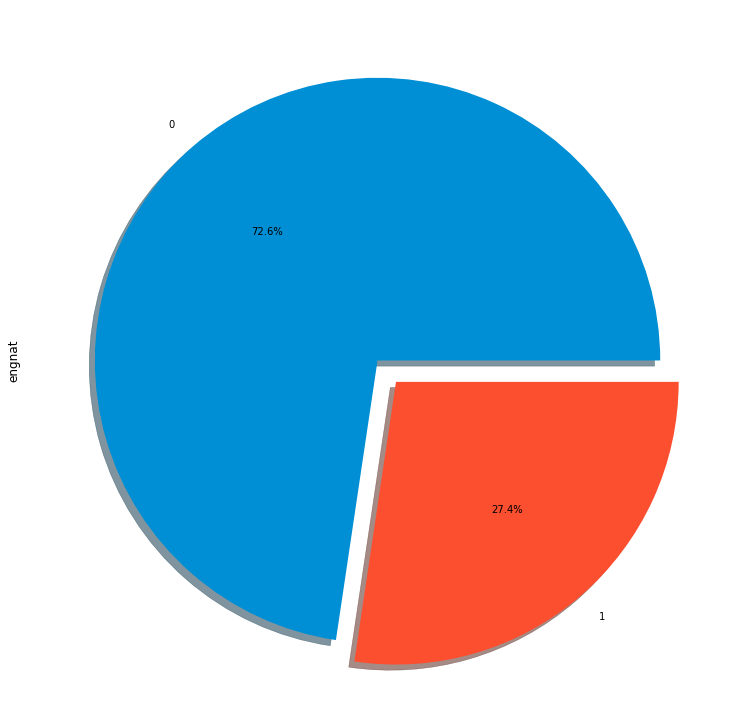

In [18]:
data['engnat'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

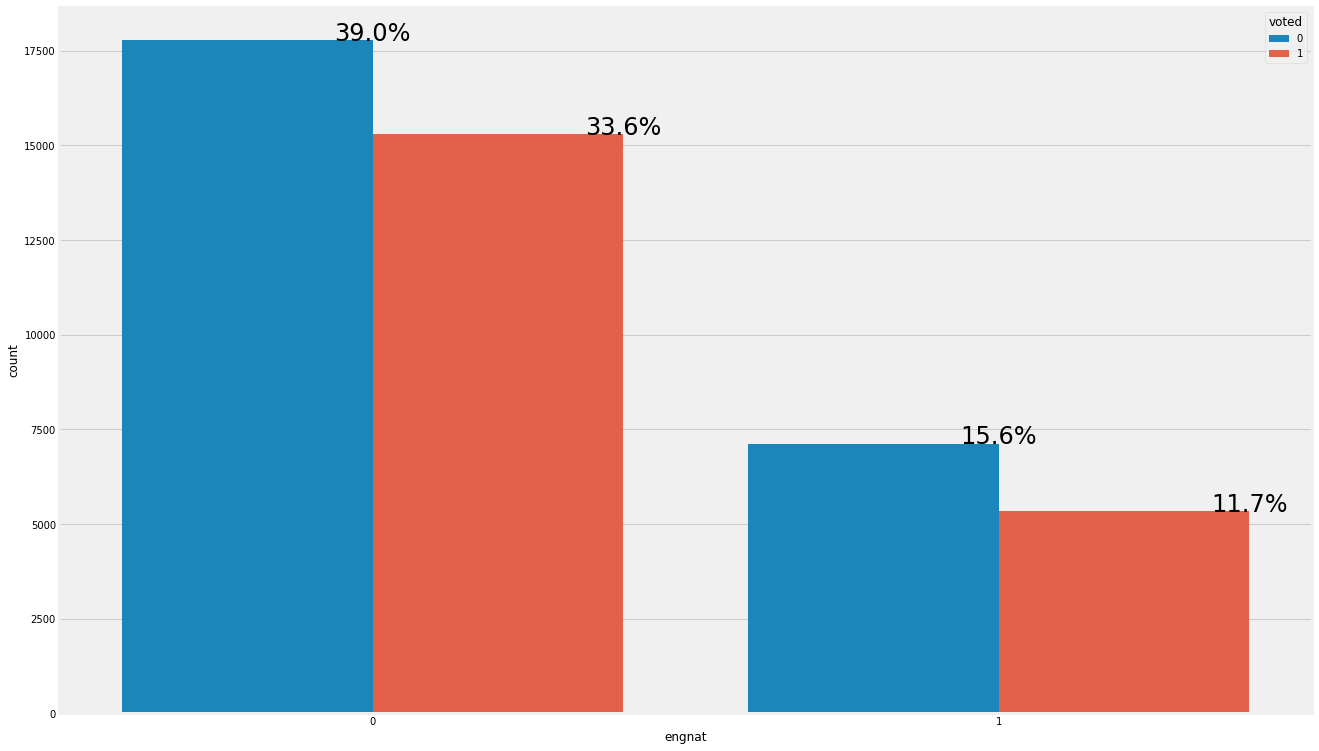

In [19]:
ax = sns.countplot('engnat',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

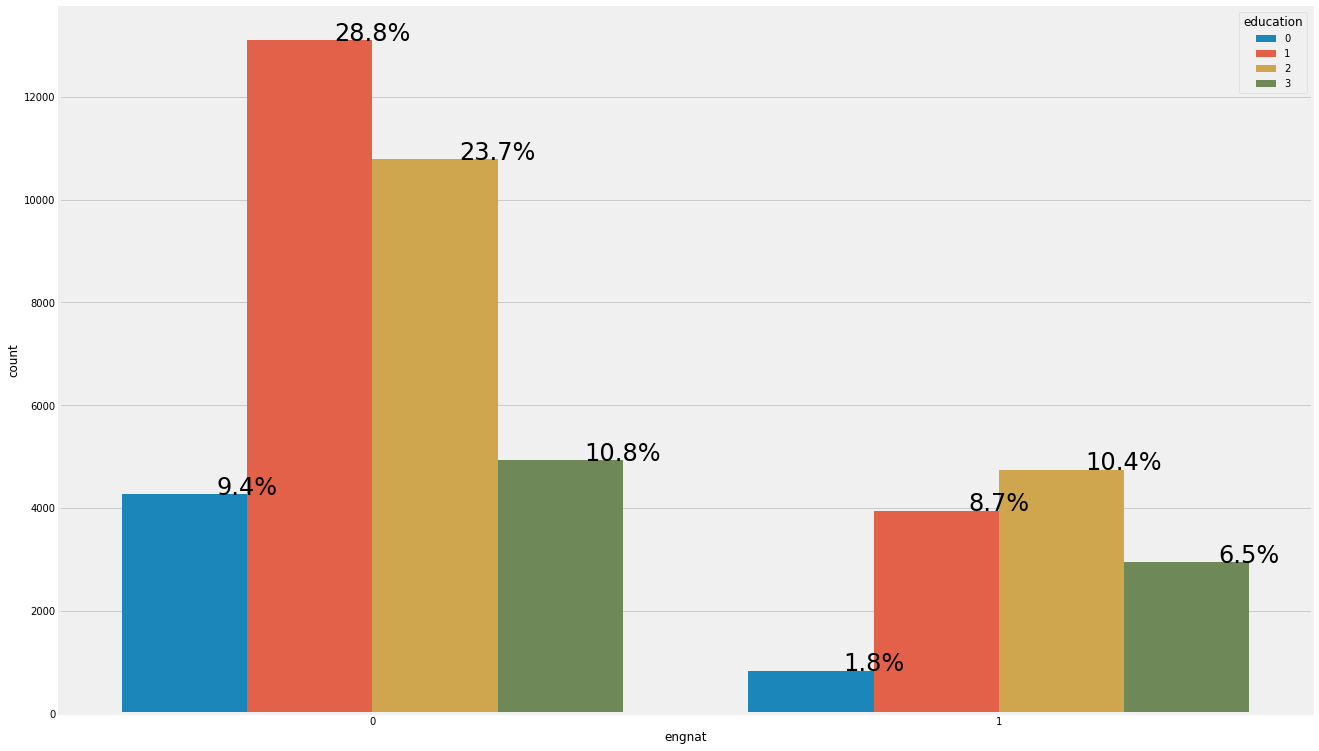

In [20]:
ax = sns.countplot('engnat',hue='education',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

- 모국어가 영어가 아닌 집단을 살펴본 결과 고학력 집단이 많다.

### 가족의 크기에 대한 분포

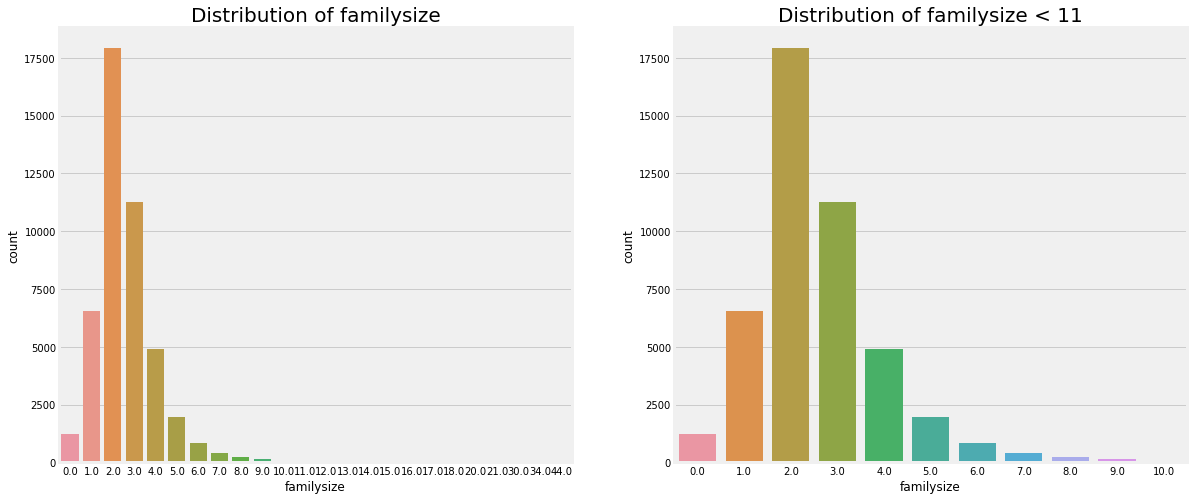

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))  #plot field

sns.countplot(data['familysize'], ax=ax[0])
ax[0].set_title('Distribution of familysize', fontsize = 20)

ff = data[data['familysize']<11]

sns.countplot(ff['familysize'], ax=ax[1])
ax[1].set_title('Distribution of familysize < 11', fontsize = 20)

plt.show()

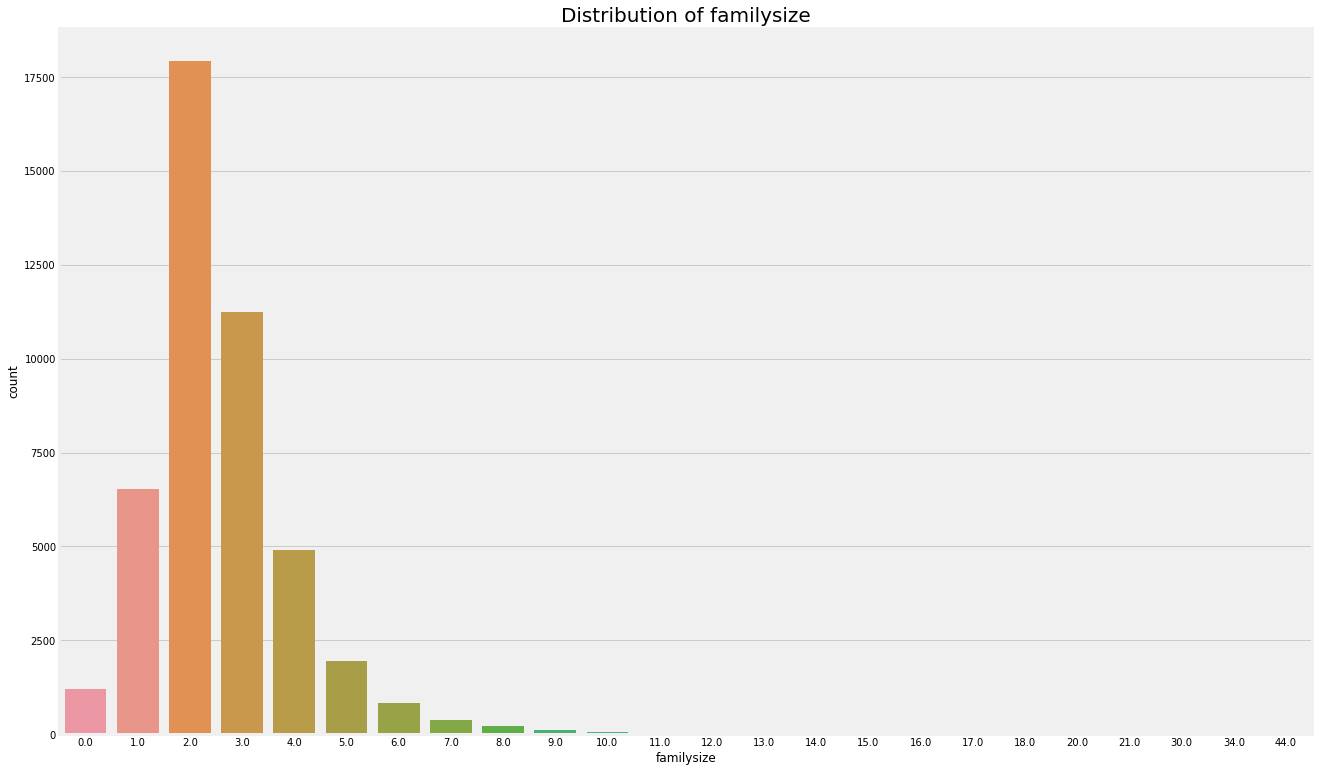

In [11]:
sns.countplot(data['familysize'])
plt.title('Distribution of familysize', fontsize = 20)

plt.savefig("family_distribution.png")

### 성별 분포

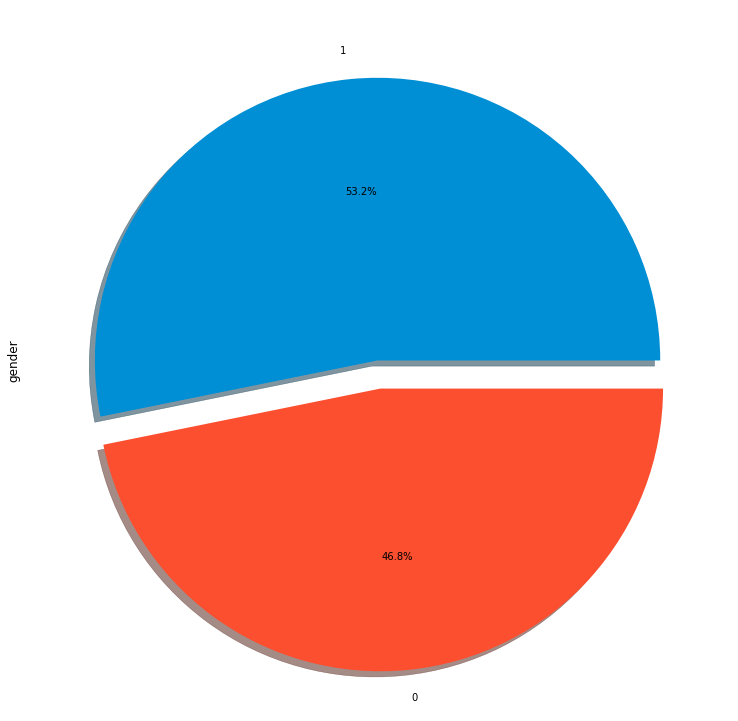

In [22]:
data['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

### 주로 사용하는 손에 대한 분포

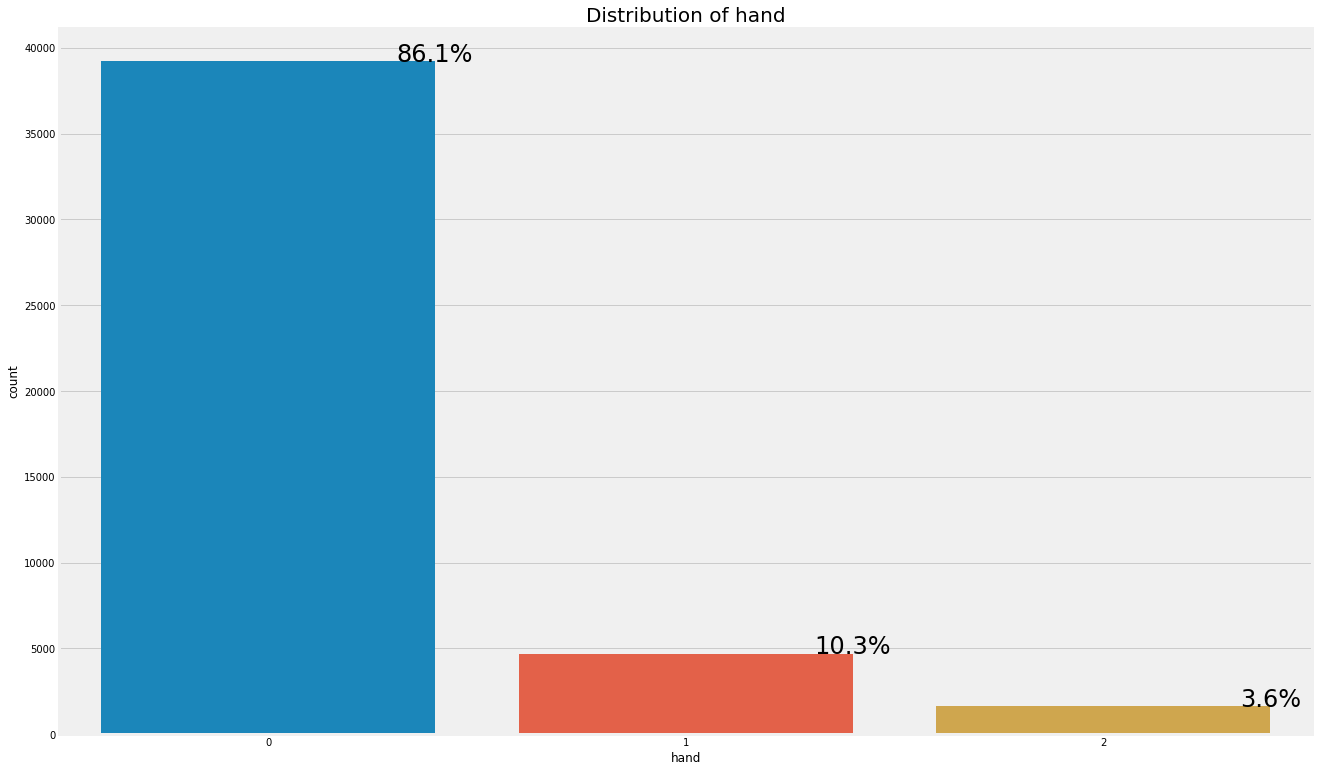

In [23]:
plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(data['hand'])
plt.title('Distribution of hand', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.show()

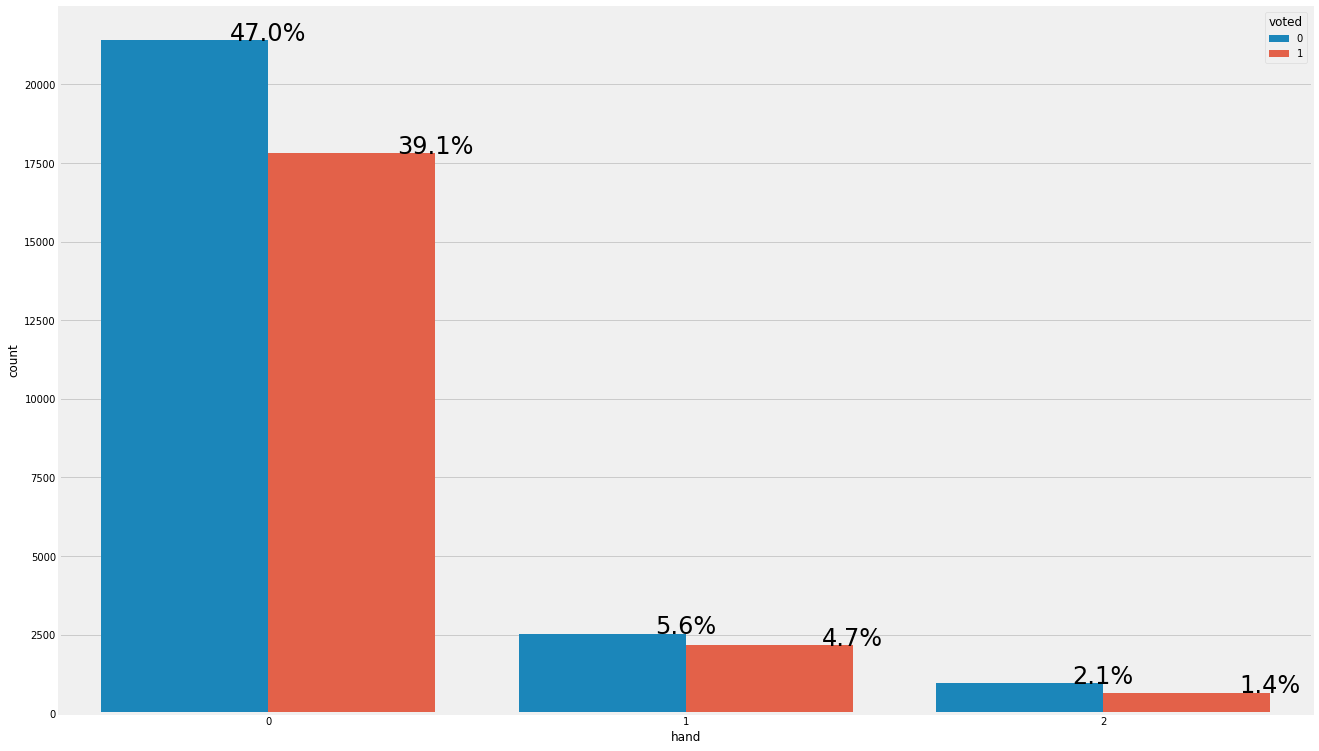

In [24]:
ax = sns.countplot('hand',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

### 결혼 여부에 대한 분포

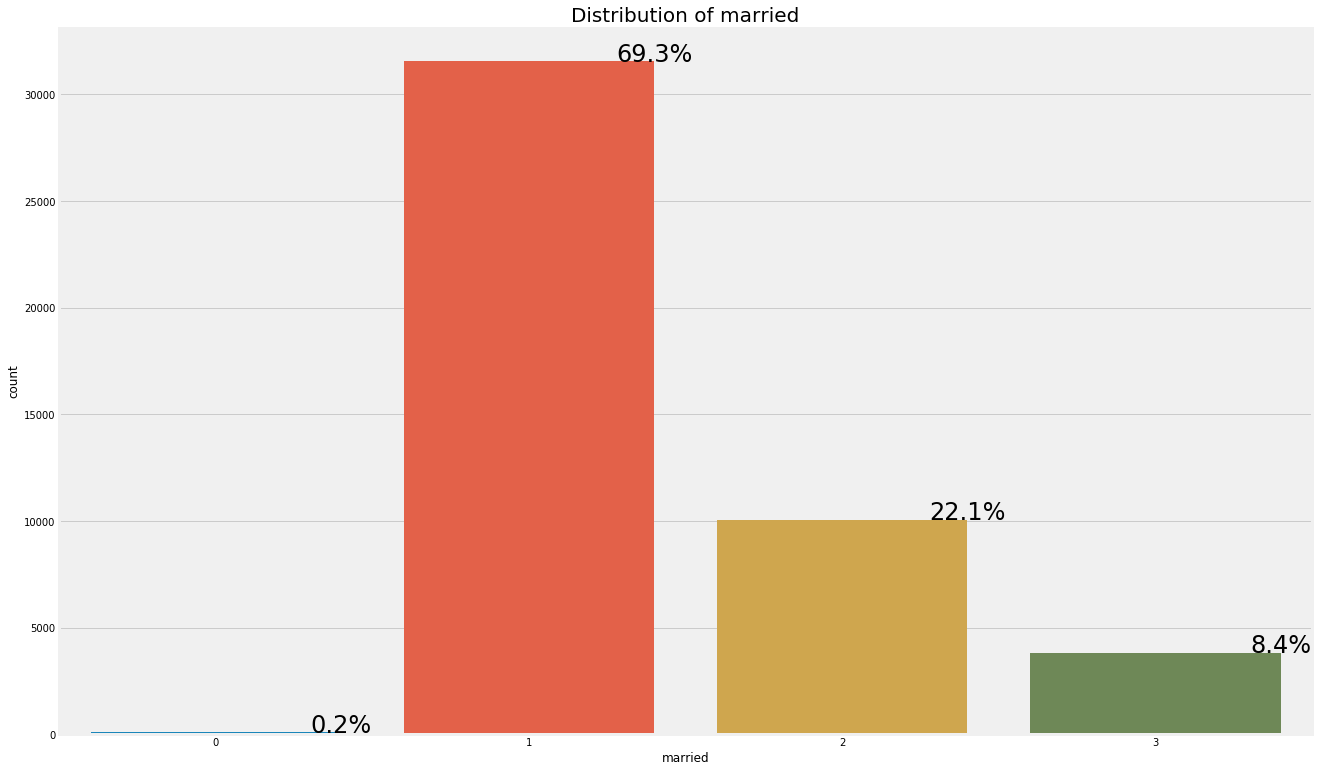

In [25]:
plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(data['married'])
plt.title('Distribution of married', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.show()

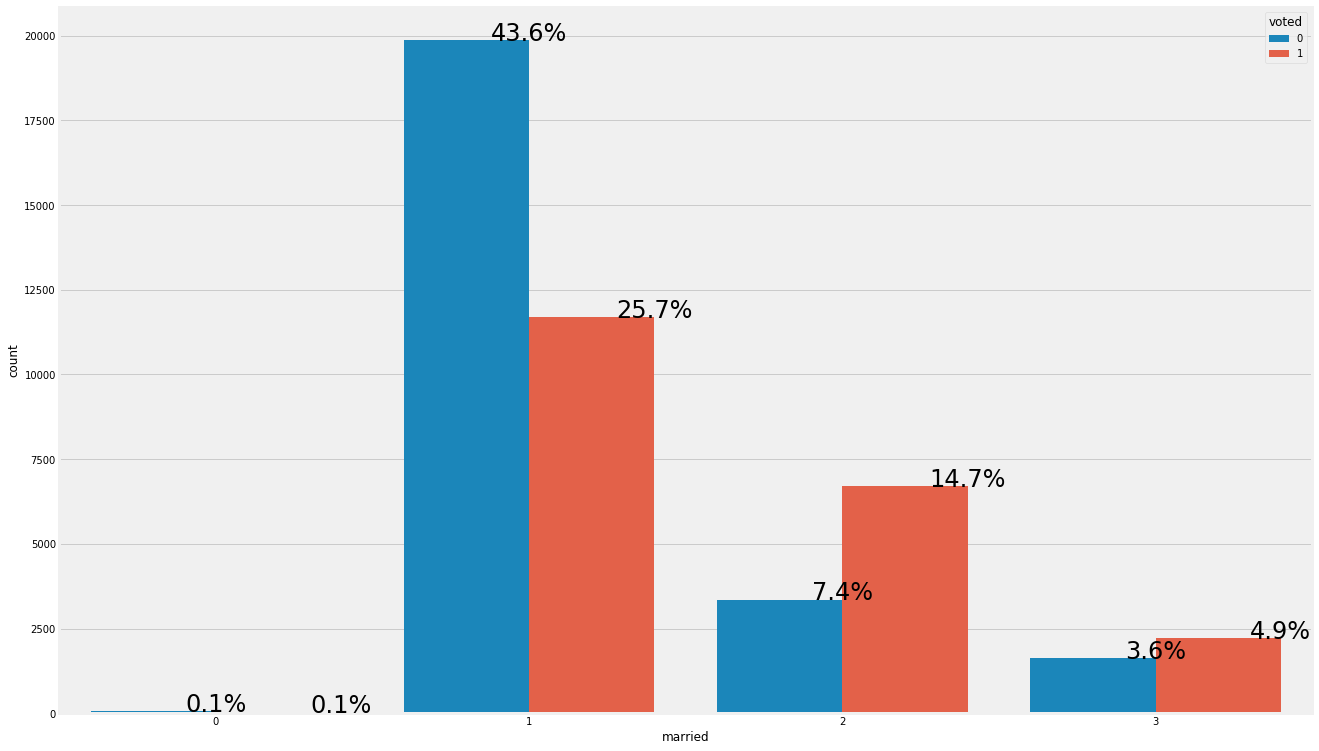

In [26]:
ax = sns.countplot('married',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

결혼 전적이 있는 경우(label = 2, 3) 투표한 사람이 더 많다.

### 인종에 대한 분포

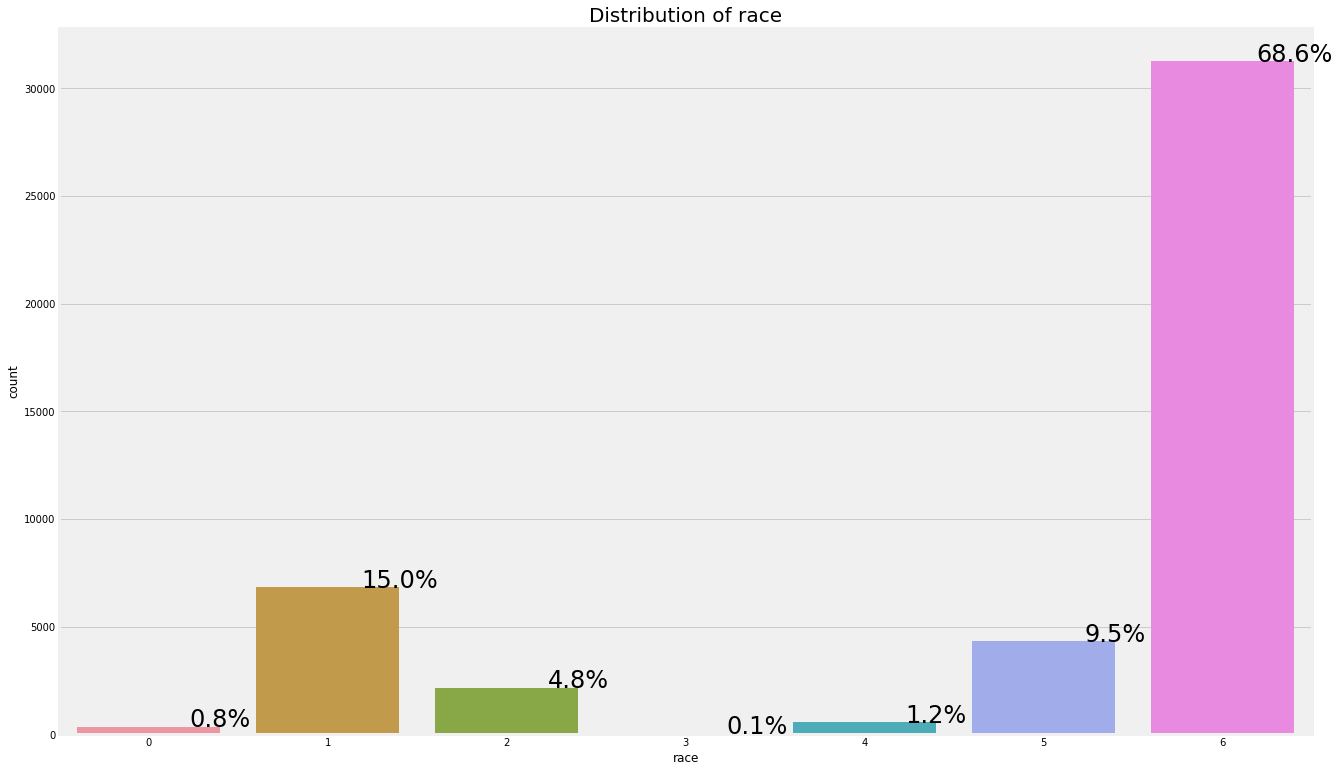

In [27]:
plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(data['race'])
plt.title('Distribution of race', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.show()

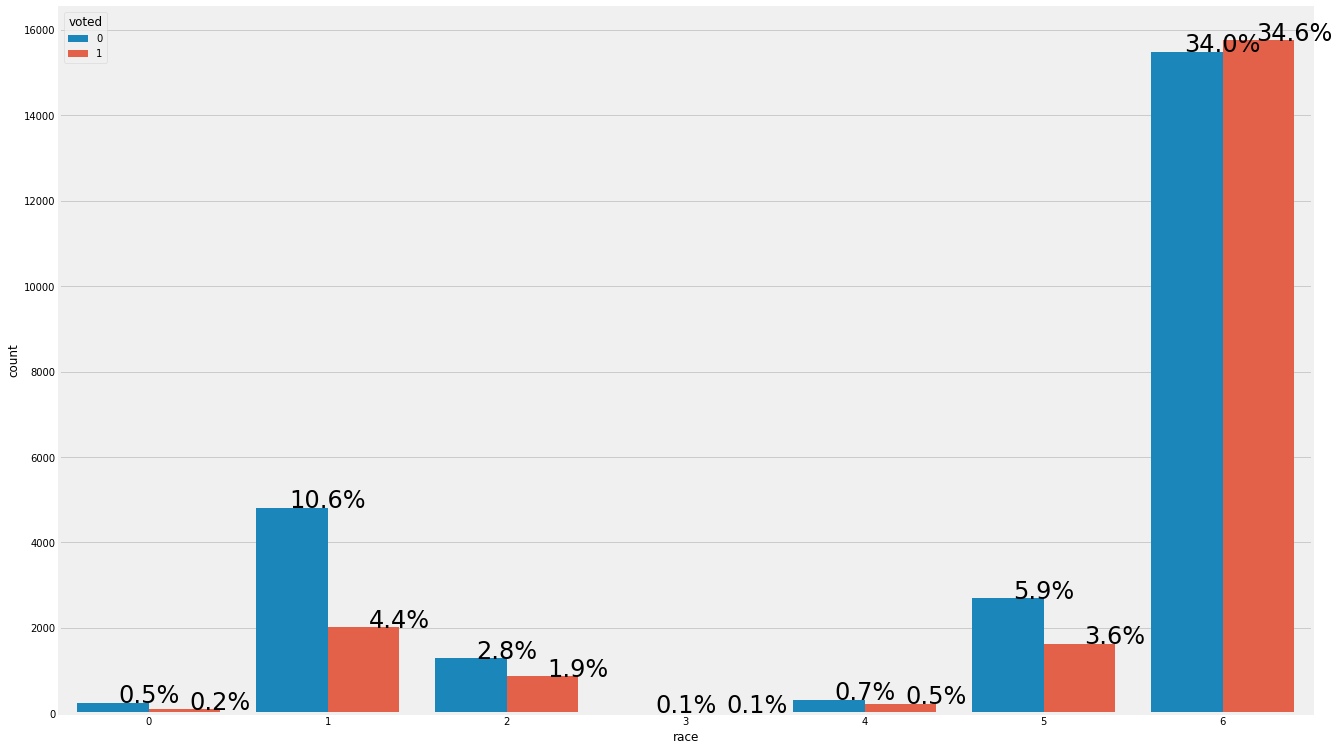

In [28]:
ax = sns.countplot('race',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

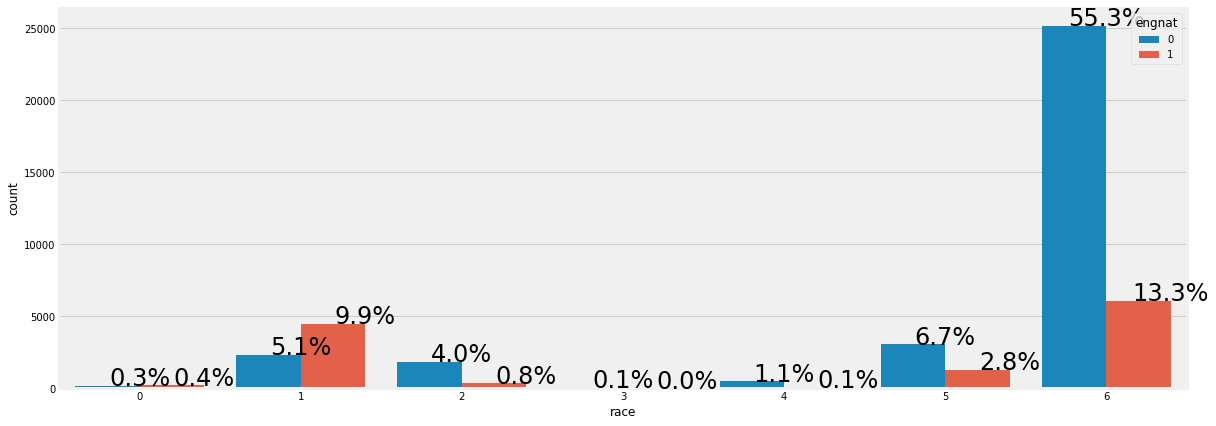

In [93]:
ax = sns.countplot('race',hue='engnat',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

### 종교에 대한 분포

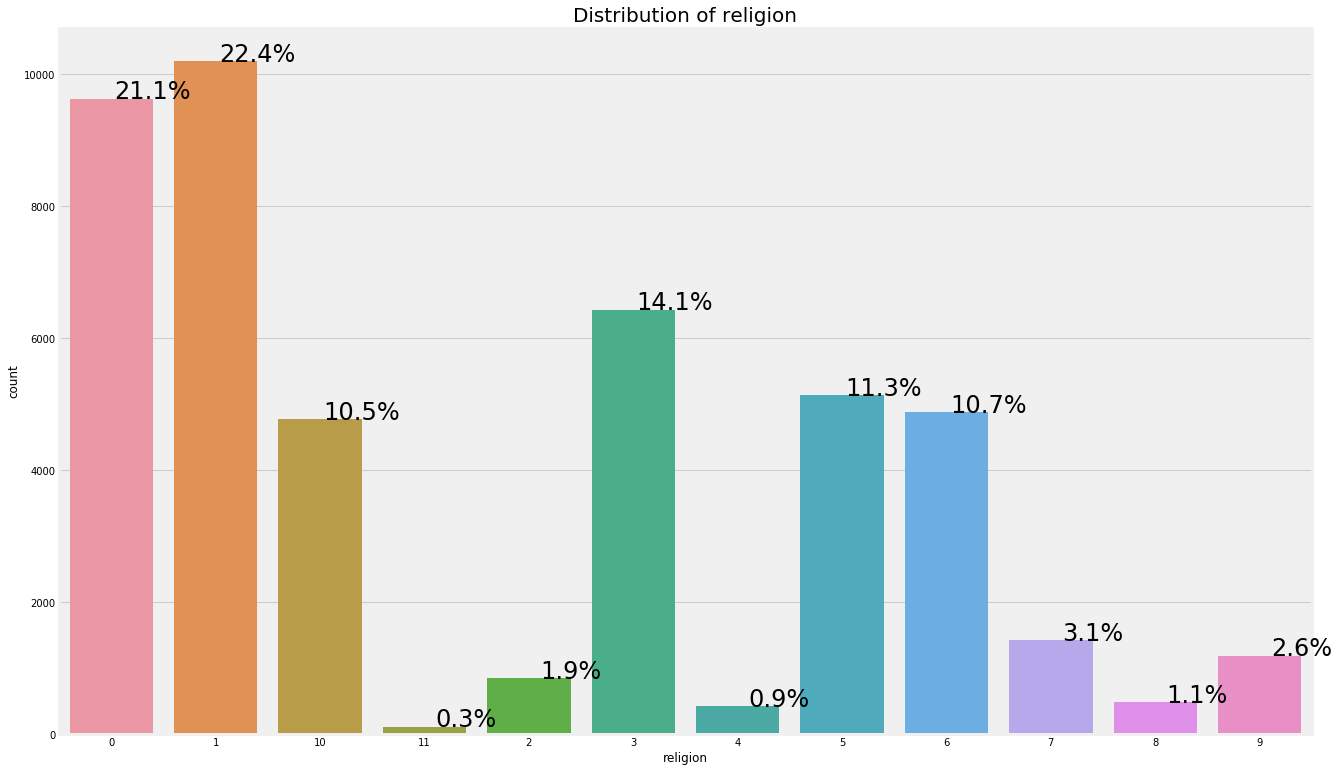

In [29]:
plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(data['religion'])
plt.title('Distribution of religion', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.show()

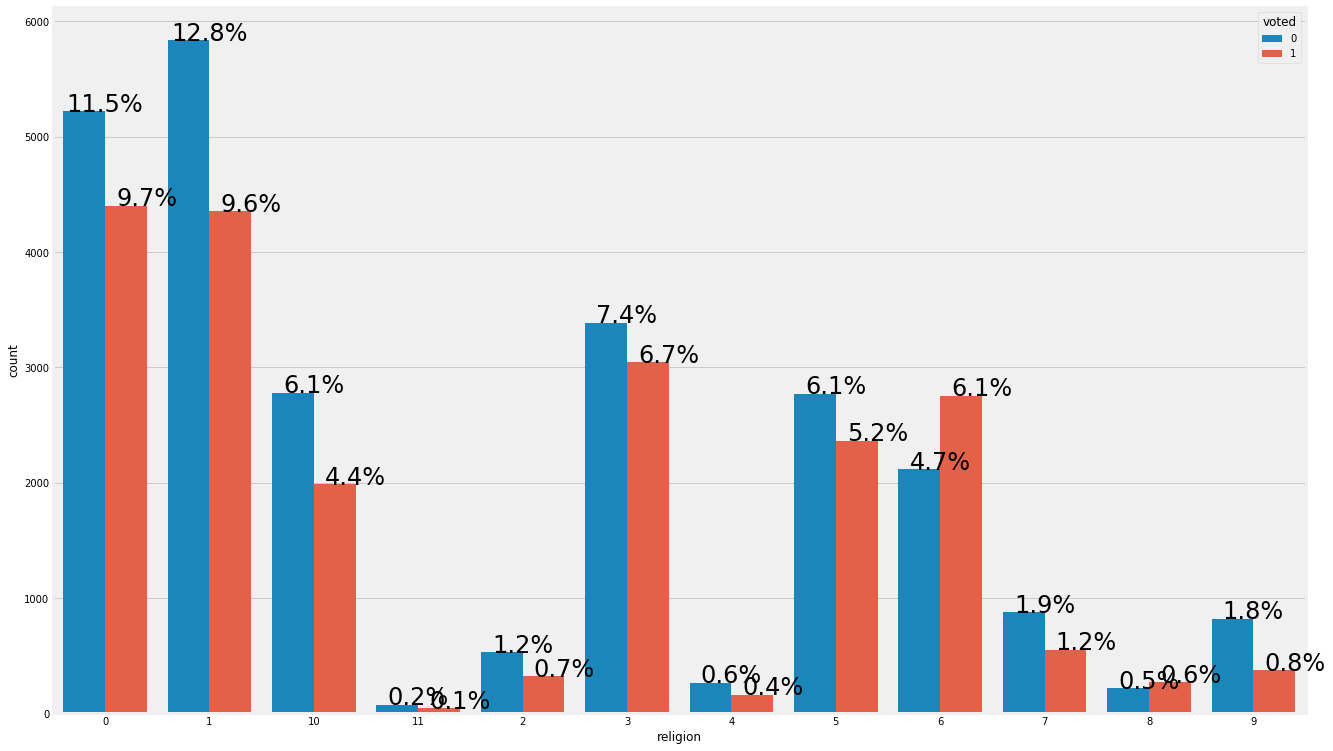

In [30]:
ax = sns.countplot('religion',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

label = 6이 유일하게 투표한 사람의 비율이 높다

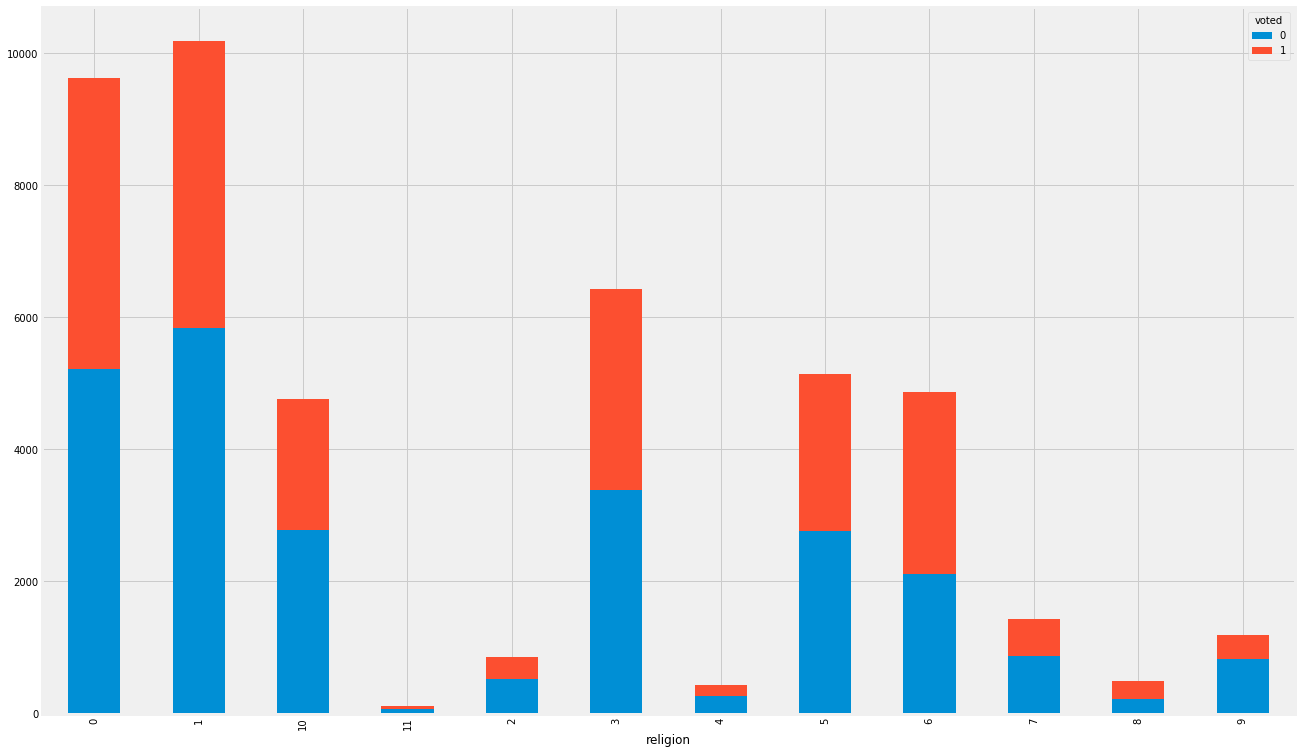

In [31]:
df_plot = data.groupby(['voted', 'religion']).size().reset_index().pivot(columns='voted', index='religion', values=0)

df_plot.plot(kind='bar', stacked=True)

### 지역에 대한 분포

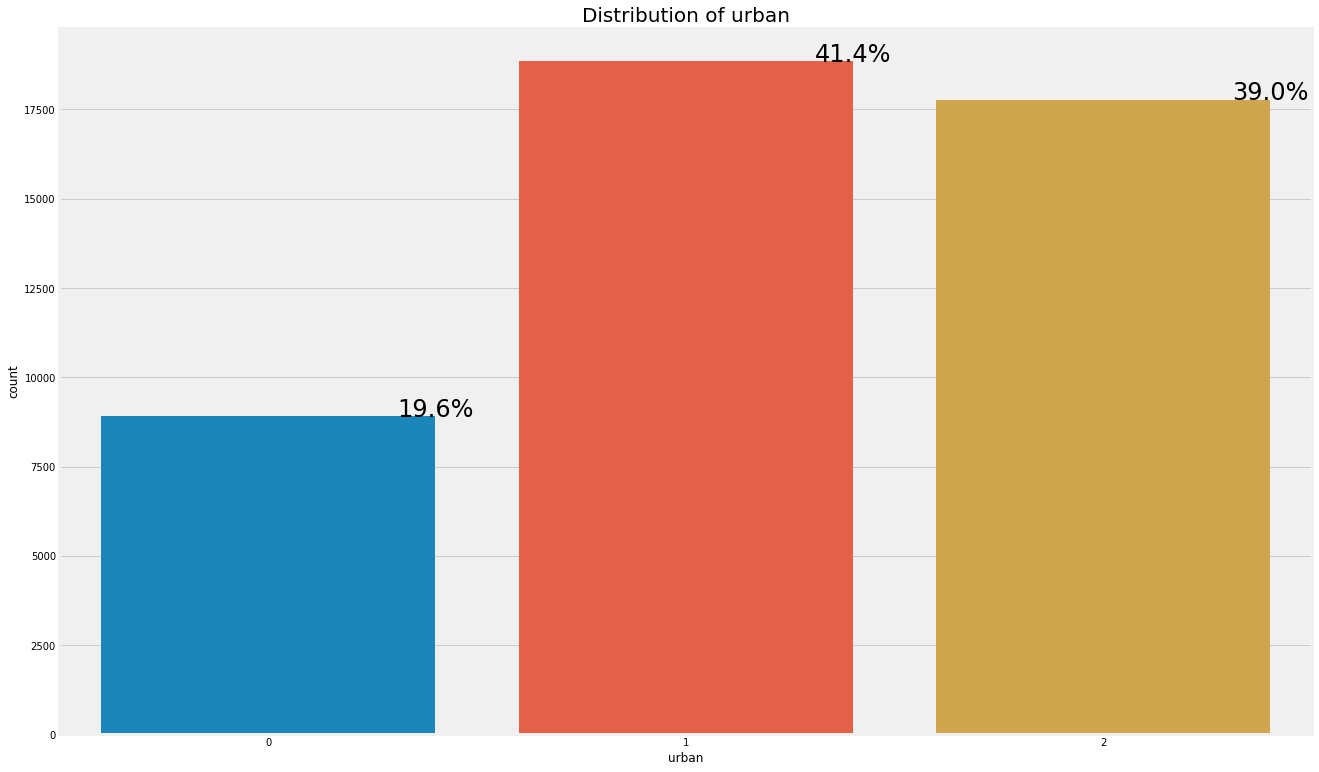

In [32]:
plt.rcParams['figure.figsize'] = (20, 13)
ax = sns.countplot(data['urban'])
plt.title('Distribution of urban', fontsize = 20)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)

plt.show()

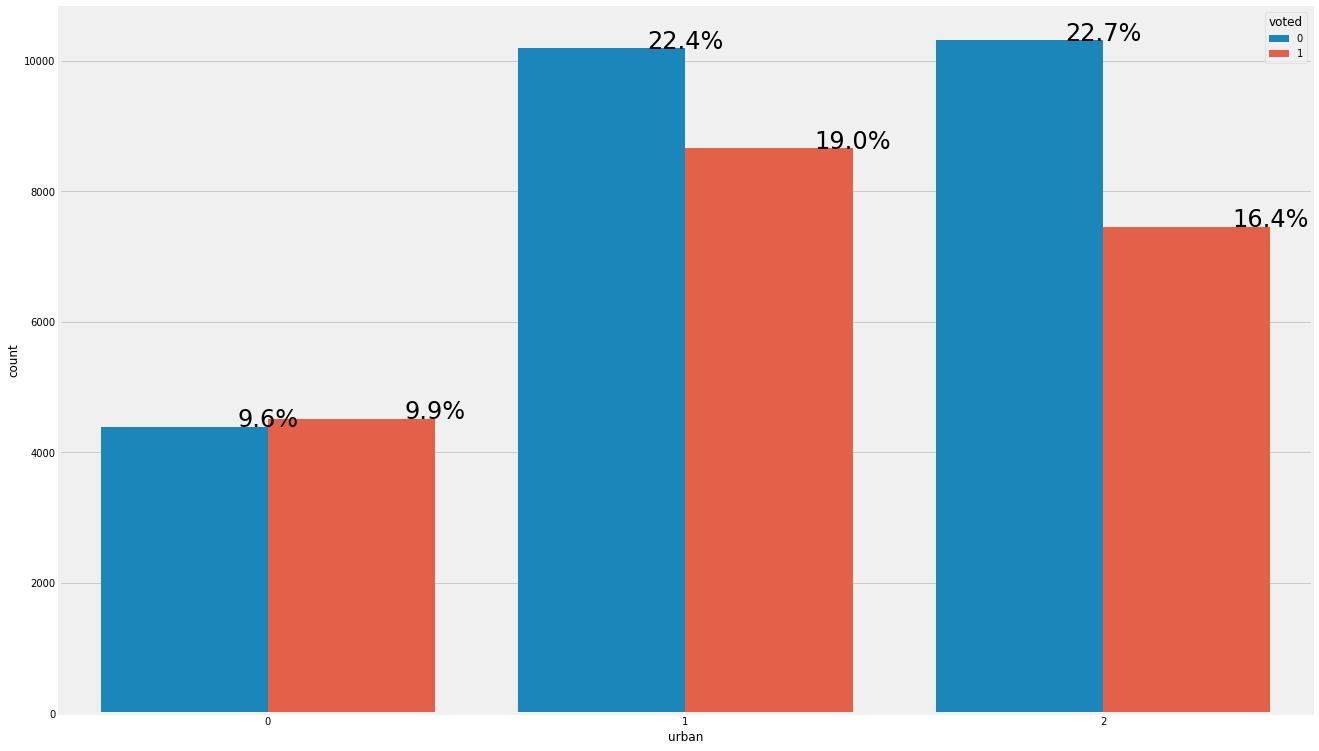

In [33]:
ax = sns.countplot('urban',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

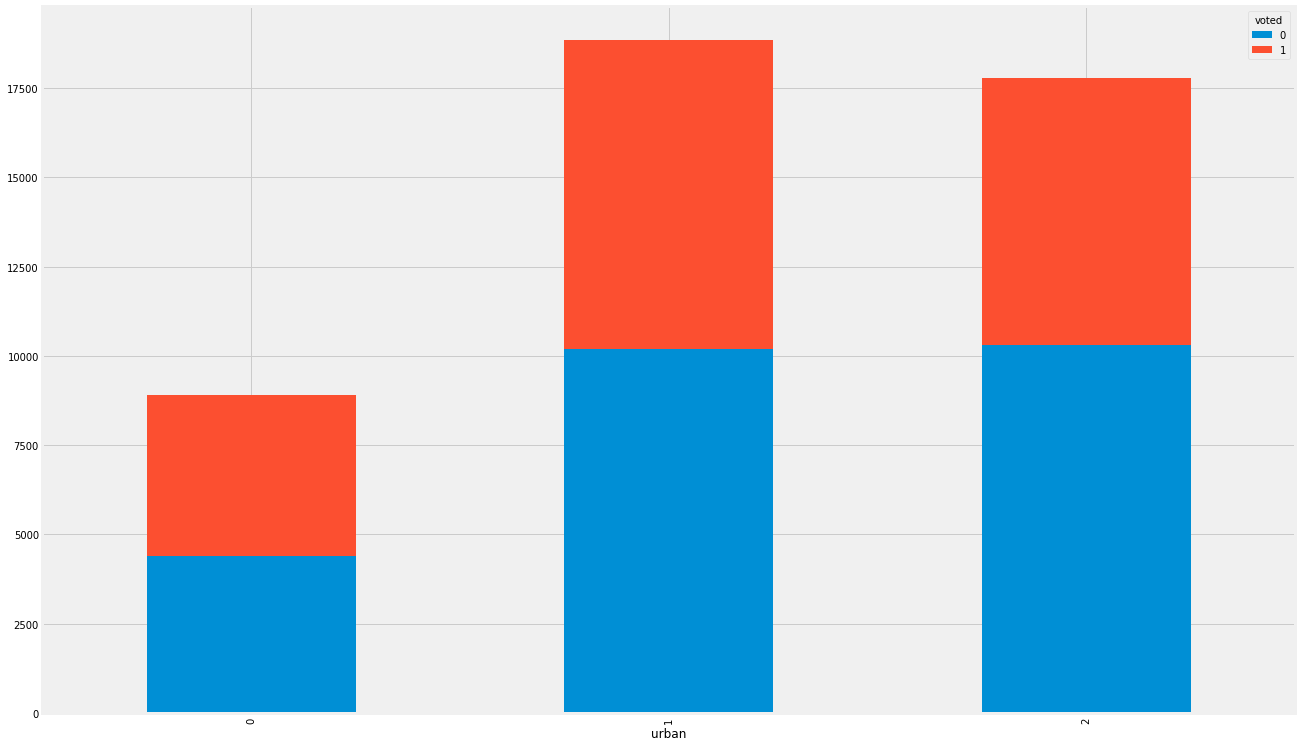

In [34]:
df_plot = data.groupby(['voted', 'urban']).size().reset_index().pivot(columns='voted', index='urban', values=0)

df_plot.plot(kind='bar', stacked=True)

---
### 수치형 변수에 관한 분포
#### 마키아벨리즘 score

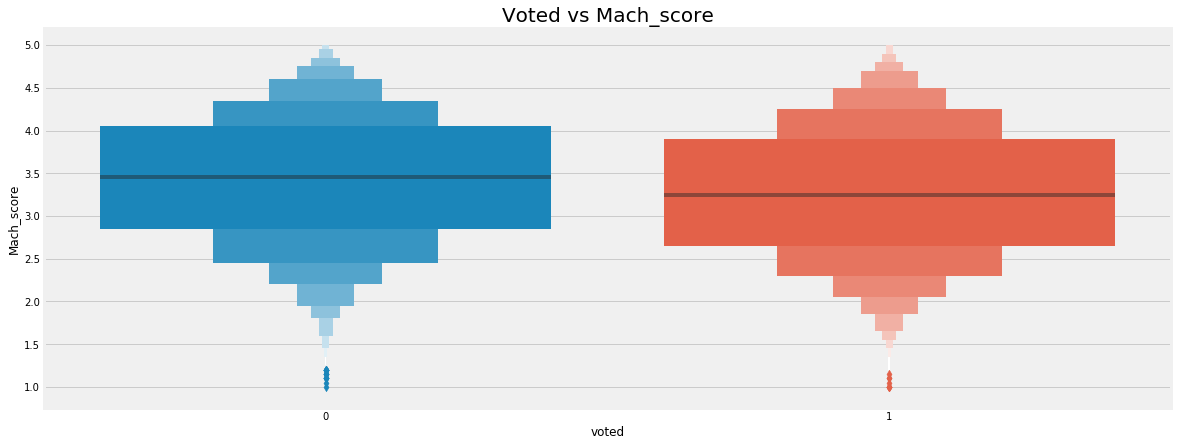

In [35]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['voted'], data['Mach_score'])
plt.title('Voted vs Mach_score', fontsize = 20)
plt.show()

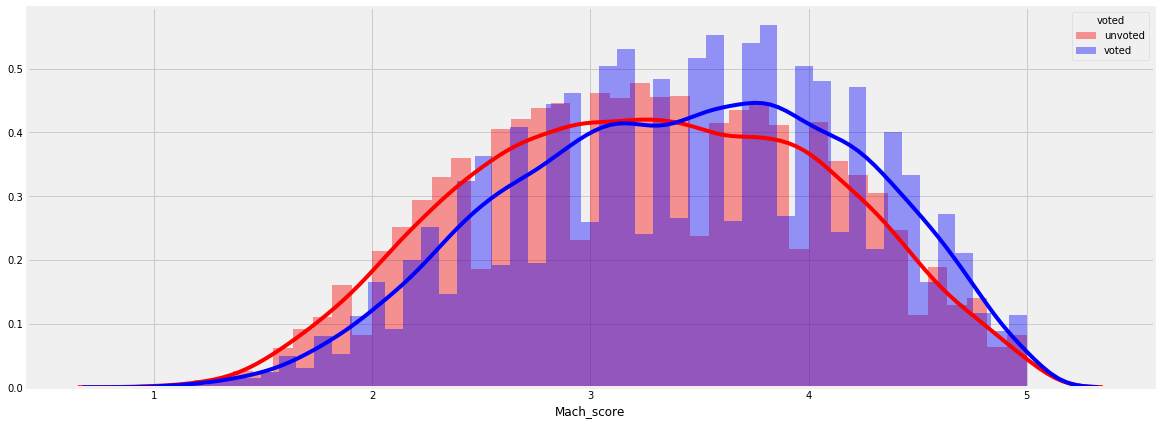

In [36]:
sns.distplot(data.Mach_score[data.voted == '1'], color = 'red', label = "unvoted")
sns.distplot(data.Mach_score[data.voted == '0'], color = 'blue', label = "voted")

plt.legend(title = 'voted')
plt.show()

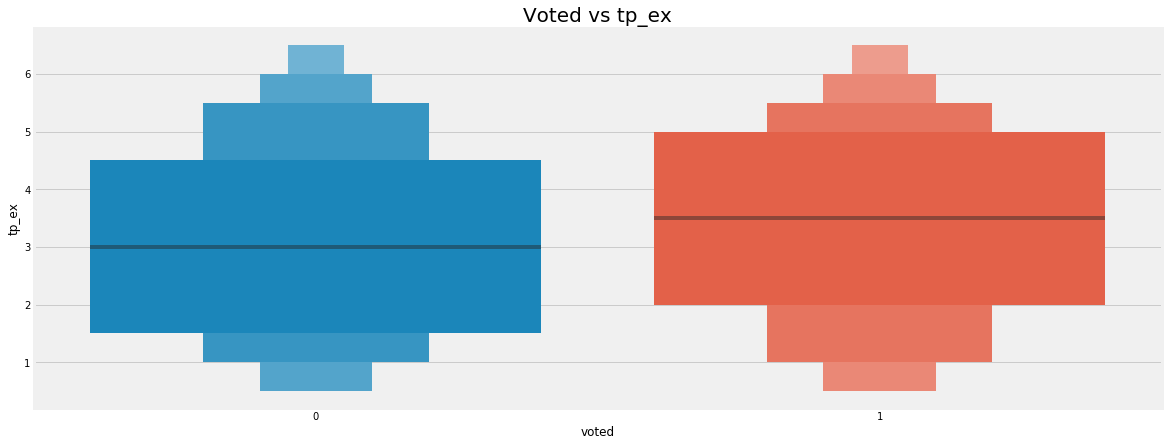

In [37]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['voted'], data['tp_ex'])
plt.title('Voted vs tp_ex', fontsize = 20)
plt.show()

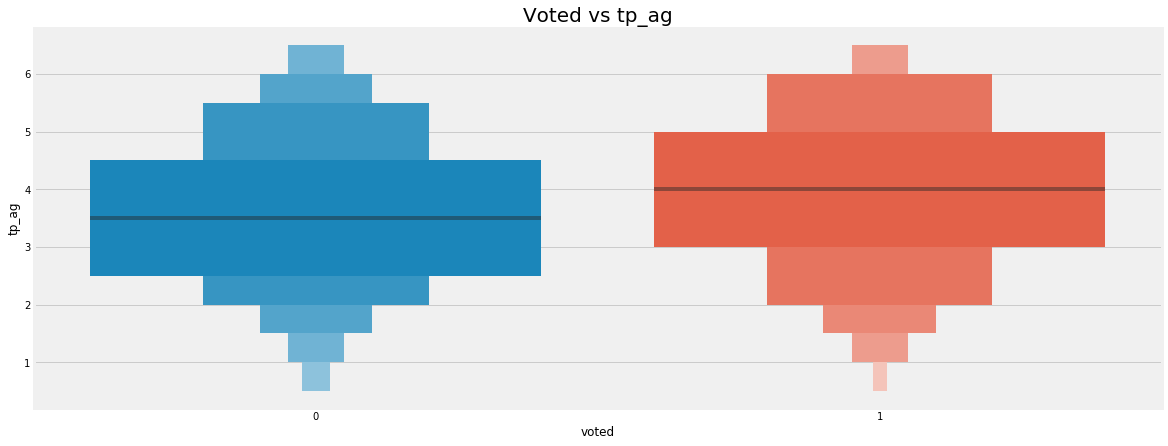

In [38]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['voted'], data['tp_ag'])
plt.title('Voted vs tp_ag', fontsize = 20)
plt.show()

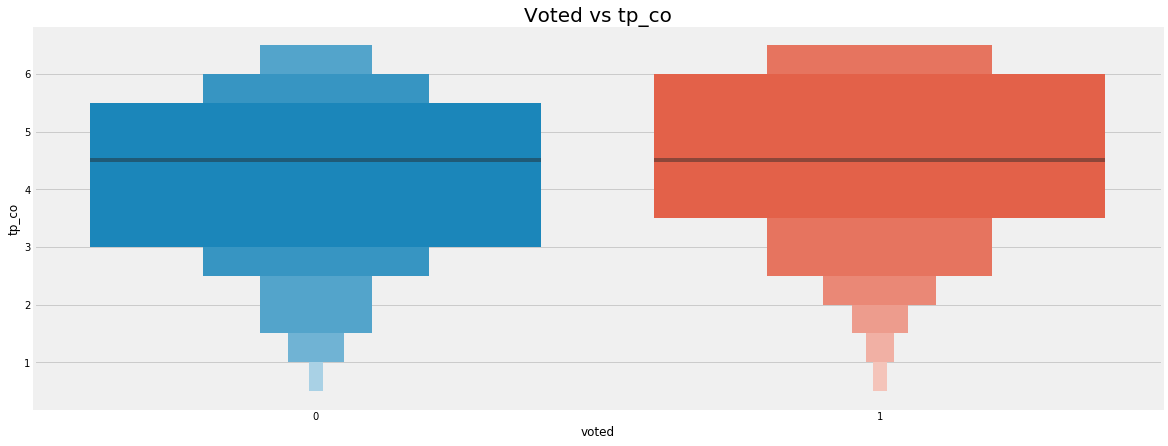

In [39]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['voted'], data['tp_co'])
plt.title('Voted vs tp_co', fontsize = 20)
plt.show()

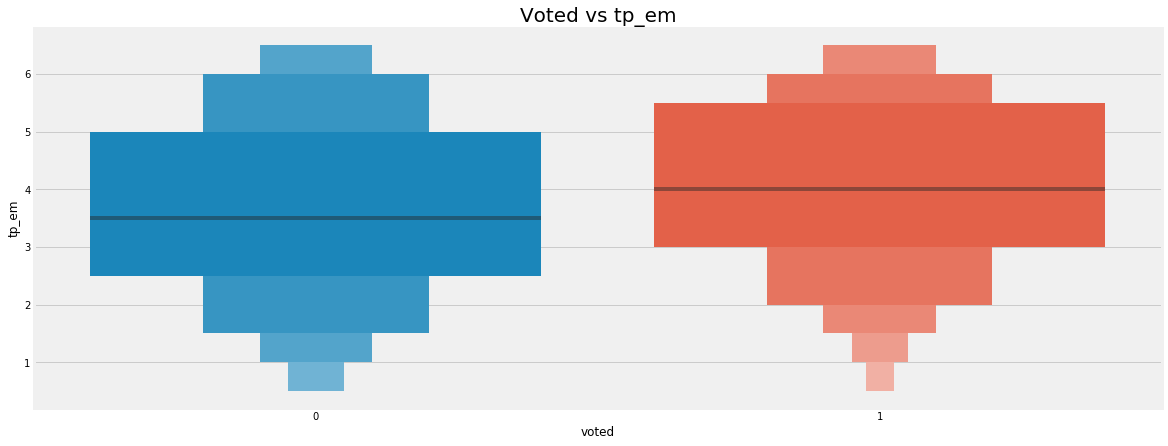

In [40]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['voted'], data['tp_em'])
plt.title('Voted vs tp_em', fontsize = 20)
plt.show()

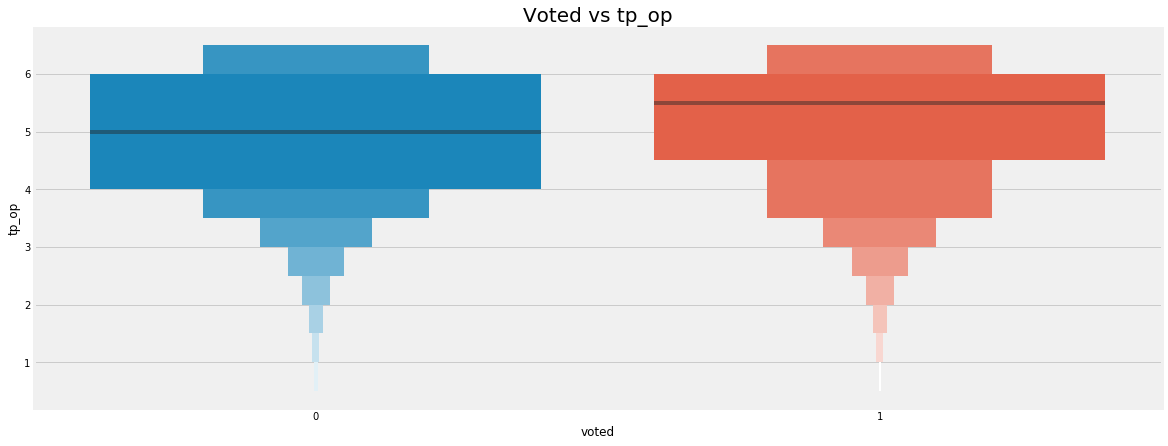

In [41]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['voted'], data['tp_op'])
plt.title('Voted vs tp_op', fontsize = 20)
plt.show()

---

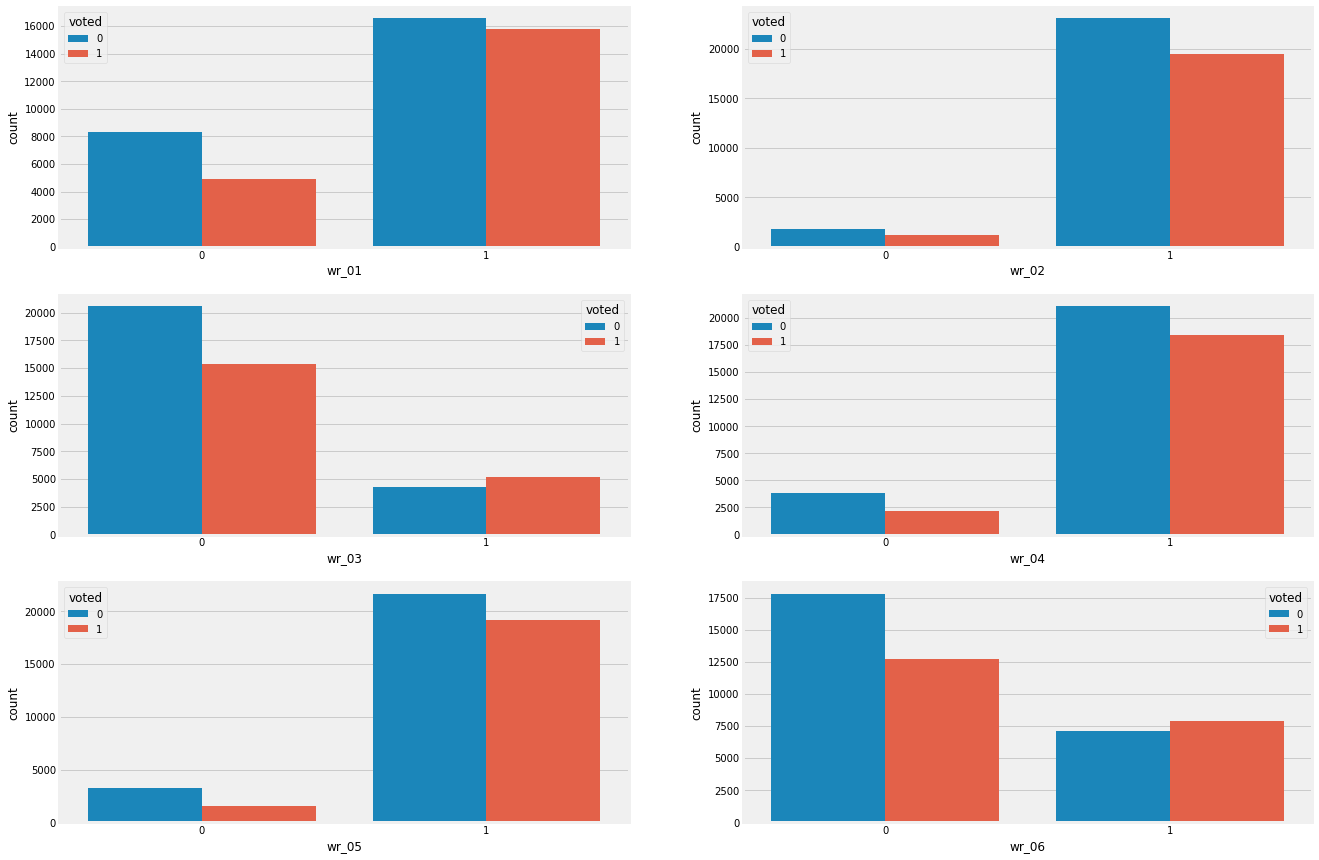

In [42]:
#wr01 ~ 06
f,ax=plt.subplots(3,2,figsize=(20, 15))  #plot field

sns.countplot('wr_01',hue='voted',data=data, ax=ax[0, 0])
sns.countplot('wr_02',hue='voted',data=data, ax=ax[0, 1])
sns.countplot('wr_03',hue='voted',data=data, ax=ax[1, 0])
sns.countplot('wr_04',hue='voted',data=data, ax=ax[1, 1])
sns.countplot('wr_05',hue='voted',data=data, ax=ax[2, 0])
sns.countplot('wr_06',hue='voted',data=data, ax=ax[2, 1])

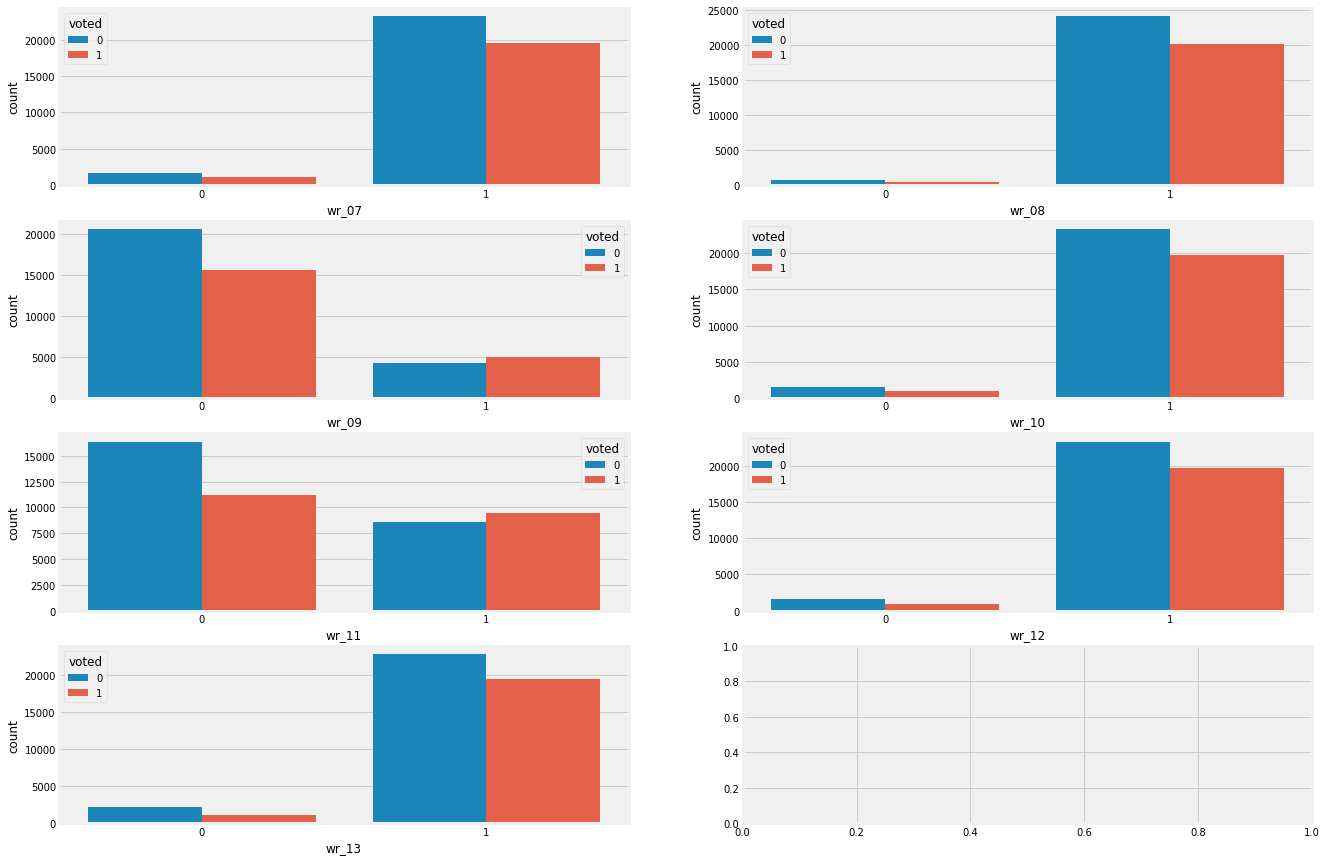

In [43]:
#wr07 ~ 13
f,ax=plt.subplots(4,2,figsize=(20, 15))  #plot field

sns.countplot('wr_07',hue='voted',data=data, ax=ax[0, 0])
sns.countplot('wr_08',hue='voted',data=data, ax=ax[0, 1])
sns.countplot('wr_09',hue='voted',data=data, ax=ax[1, 0])
sns.countplot('wr_10',hue='voted',data=data, ax=ax[1, 1])
sns.countplot('wr_11',hue='voted',data=data, ax=ax[2, 0])
sns.countplot('wr_12',hue='voted',data=data, ax=ax[2, 1])
sns.countplot('wr_13',hue='voted',data=data, ax=ax[3, 0])

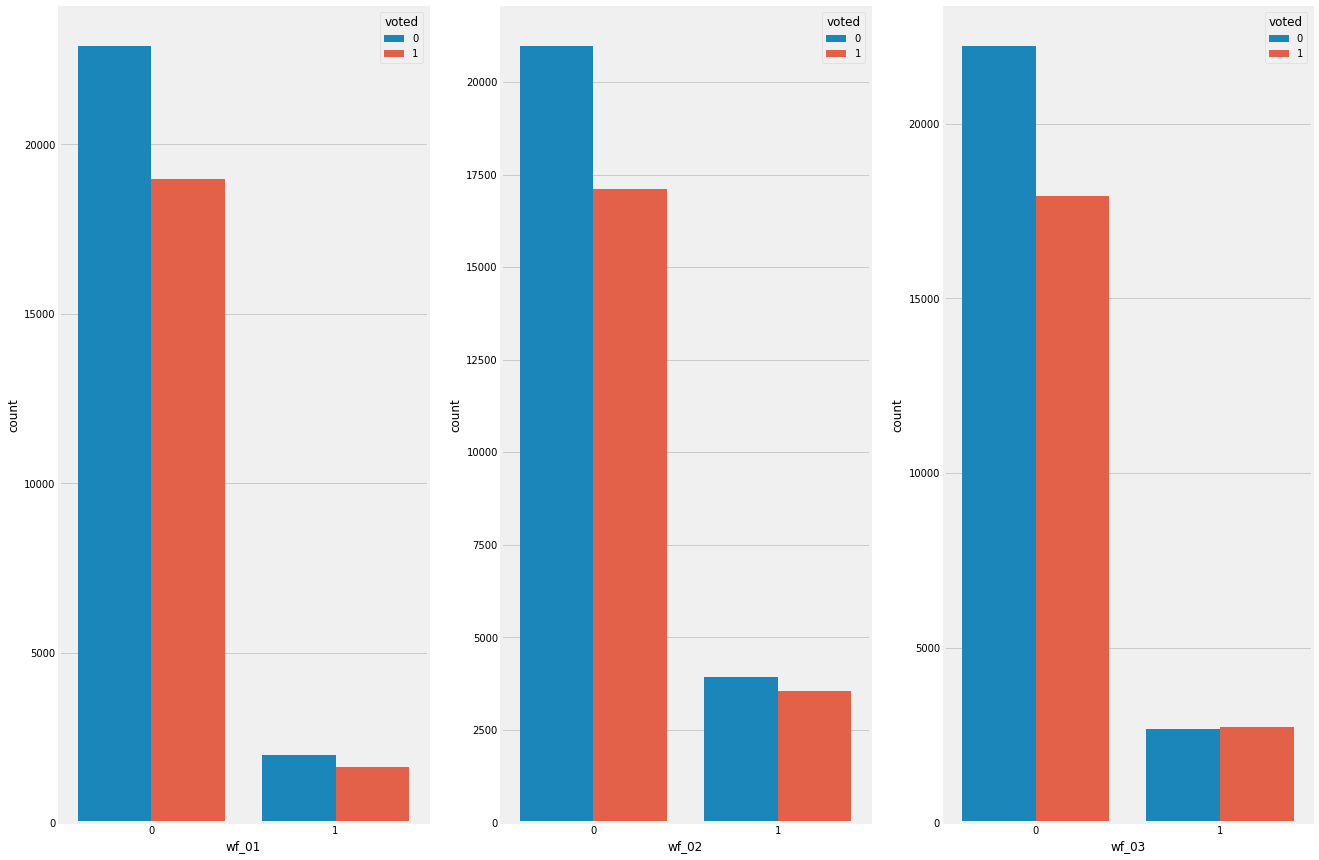

In [44]:
#wr07 ~ 13
f,ax=plt.subplots(1, 3,figsize=(20, 15))  #plot field

sns.countplot('wf_01',hue='voted',data=data, ax=ax[0])
sns.countplot('wf_02',hue='voted',data=data, ax=ax[1])
sns.countplot('wf_03',hue='voted',data=data, ax=ax[2])

#### 고학력자 집단

In [45]:
high = data[(data['education'] == '2') | (data['education'] == '3')]
high

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,...,wr_10,wr_11,wr_12,wr_13,Mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op
1,2,3,1,3.0,0,0,1,1,7,2,...,1,0,1,1,2.60,4.000000,2.500000,5.500000,3.500000,5.000000
2,3,2,0,3.0,1,0,2,6,10,1,...,1,0,1,1,1.90,4.500000,4.000000,6.000000,5.500000,3.500000
3,2,3,1,0.0,0,0,1,1,7,2,...,1,0,1,1,3.35,4.000000,5.000000,4.500000,3.500000,4.500000
4,2,2,0,2.0,1,0,2,6,0,0,...,1,1,1,1,3.00,4.000000,4.000000,6.000000,5.500000,6.500000
8,2,3,1,0.0,0,1,1,5,5,0,...,0,0,1,1,3.10,4.000000,3.000000,3.500000,3.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,5,2,0,4.0,1,0,2,6,6,2,...,0,0,0,0,1.60,1.736047,3.794966,4.369336,3.881856,4.991094
45513,3,3,1,2.0,1,0,1,6,0,2,...,1,0,1,1,4.05,3.500000,1.000000,5.000000,4.500000,4.500000
45519,3,2,1,2.0,1,0,2,1,7,2,...,1,0,1,1,3.40,3.000000,4.000000,2.500000,3.000000,6.000000
45522,5,3,1,2.0,1,0,3,6,10,0,...,1,0,1,1,4.25,2.000000,5.000000,5.500000,6.500000,5.500000


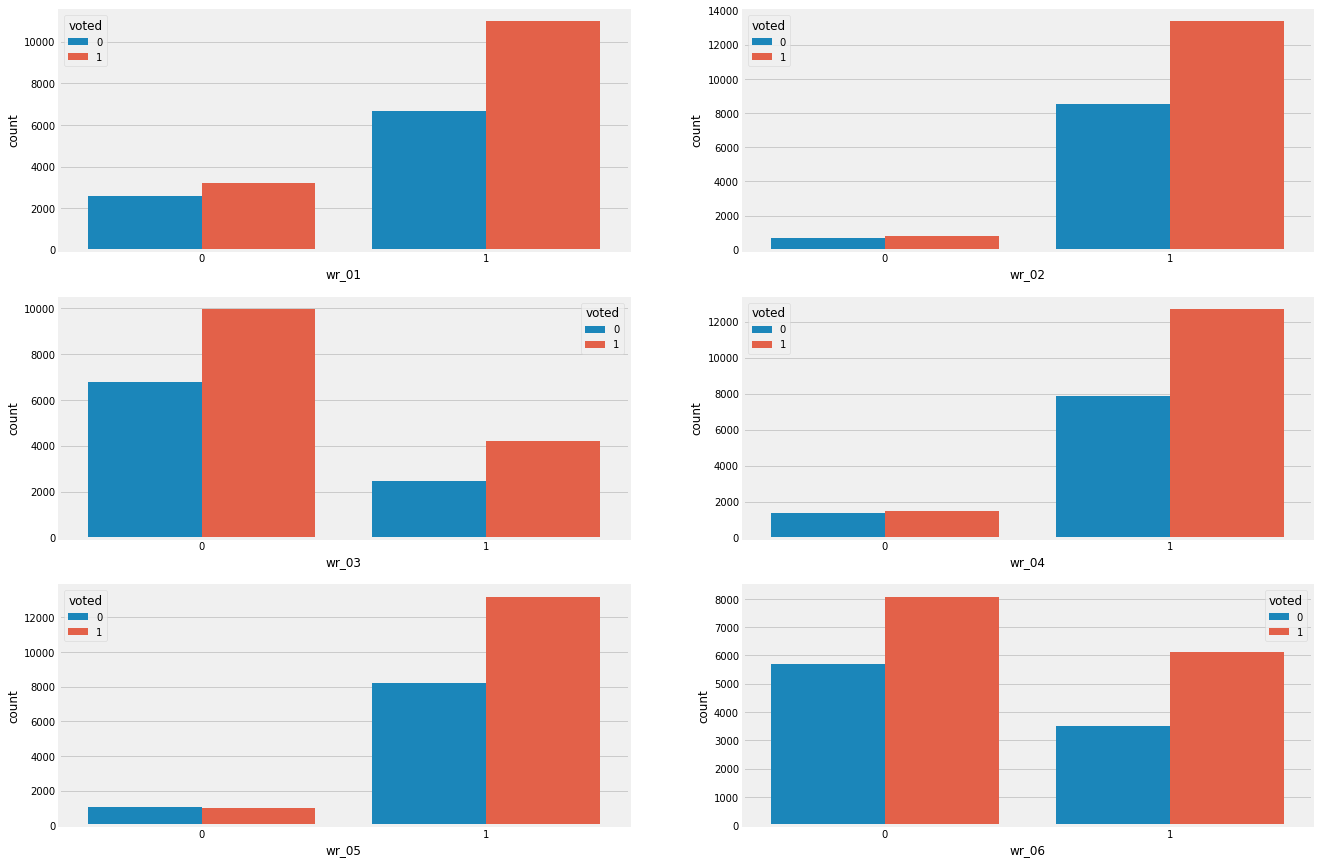

In [46]:
#wr01 ~ 06
f,ax=plt.subplots(3,2,figsize=(20, 15))  #plot field

sns.countplot('wr_01',hue='voted',data=high, ax=ax[0, 0])
sns.countplot('wr_02',hue='voted',data=high, ax=ax[0, 1])
sns.countplot('wr_03',hue='voted',data=high, ax=ax[1, 0])
sns.countplot('wr_04',hue='voted',data=high, ax=ax[1, 1])
sns.countplot('wr_05',hue='voted',data=high, ax=ax[2, 0])
sns.countplot('wr_06',hue='voted',data=high, ax=ax[2, 1])

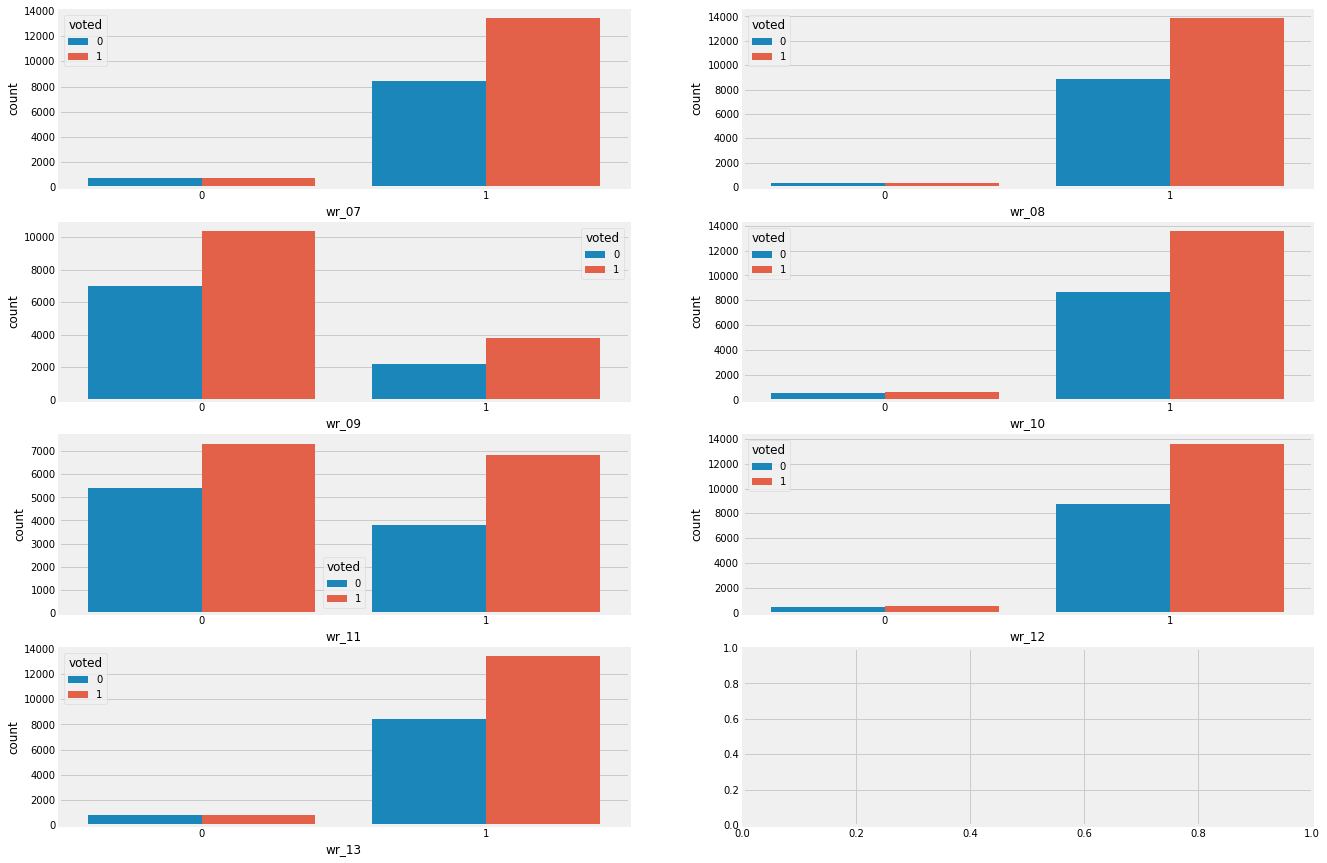

In [47]:
#wr07 ~ 13
f,ax=plt.subplots(4,2,figsize=(20, 15))  #plot field

sns.countplot('wr_07',hue='voted',data=high, ax=ax[0, 0])
sns.countplot('wr_08',hue='voted',data=high, ax=ax[0, 1])
sns.countplot('wr_09',hue='voted',data=high, ax=ax[1, 0])
sns.countplot('wr_10',hue='voted',data=high, ax=ax[1, 1])
sns.countplot('wr_11',hue='voted',data=high, ax=ax[2, 0])
sns.countplot('wr_12',hue='voted',data=high, ax=ax[2, 1])
sns.countplot('wr_13',hue='voted',data=high, ax=ax[3, 0])

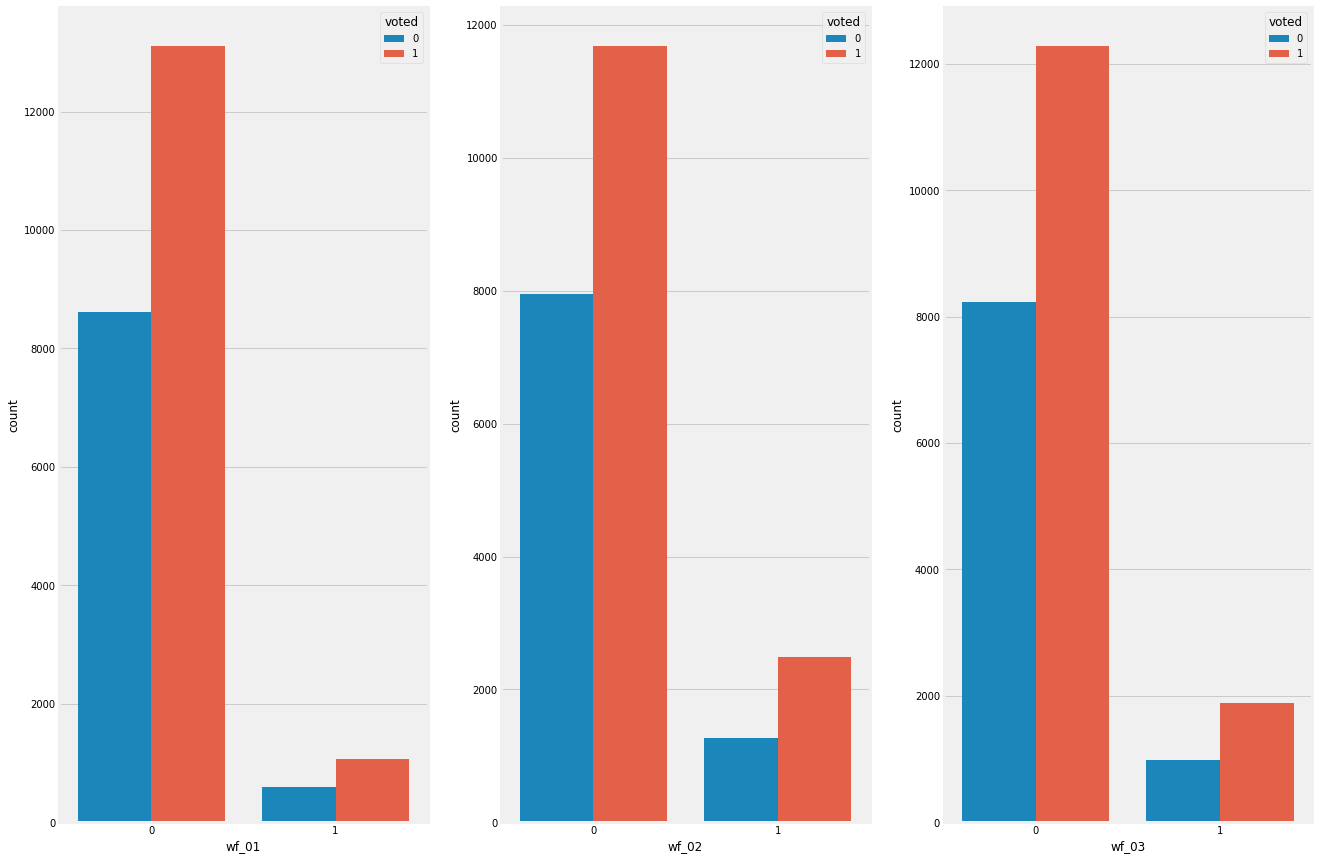

In [48]:
#wr07 ~ 13
f,ax=plt.subplots(1, 3,figsize=(20, 15))  #plot field

sns.countplot('wf_01',hue='voted',data=high, ax=ax[0])
sns.countplot('wf_02',hue='voted',data=high, ax=ax[1])
sns.countplot('wf_03',hue='voted',data=high, ax=ax[2])

---

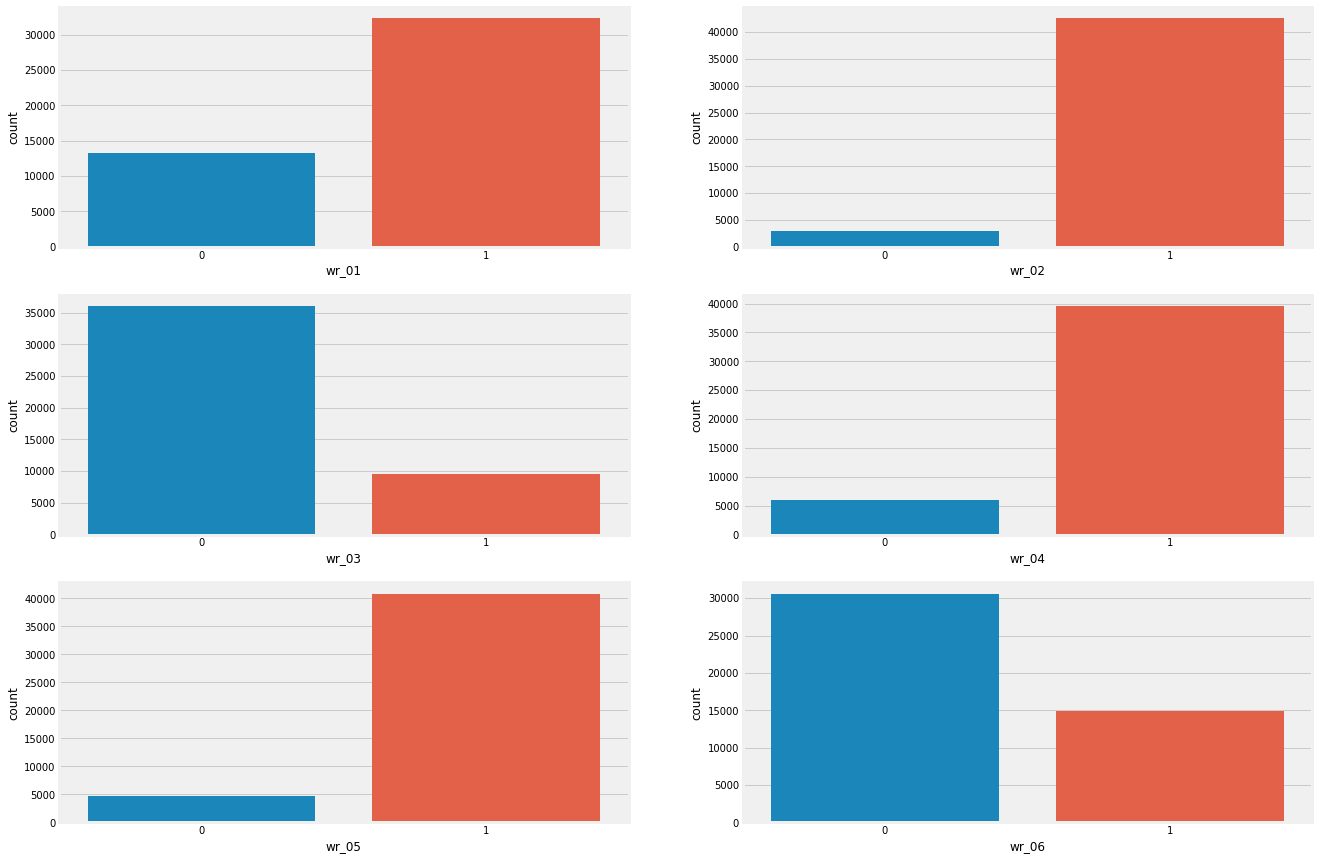

In [12]:
#wr01 ~ 06
f,ax=plt.subplots(3,2,figsize=(20, 15))  #plot field

sns.countplot('wr_01', data=data, ax=ax[0, 0])
sns.countplot('wr_02', data=data, ax=ax[0, 1])
sns.countplot('wr_03', data=data, ax=ax[1, 0])
sns.countplot('wr_04', data=data, ax=ax[1, 1])
sns.countplot('wr_05', data=data, ax=ax[2, 0])
sns.countplot('wr_06', data=data, ax=ax[2, 1])

plt.savefig("wr1.png")

0 : 모른다, 1 : 안다

#### 대체로 아는 단어
- wr_01
- wr_02
- wr_04
- wr_05

#### 대체로 모르는 단어
- wr_03
- wr_06

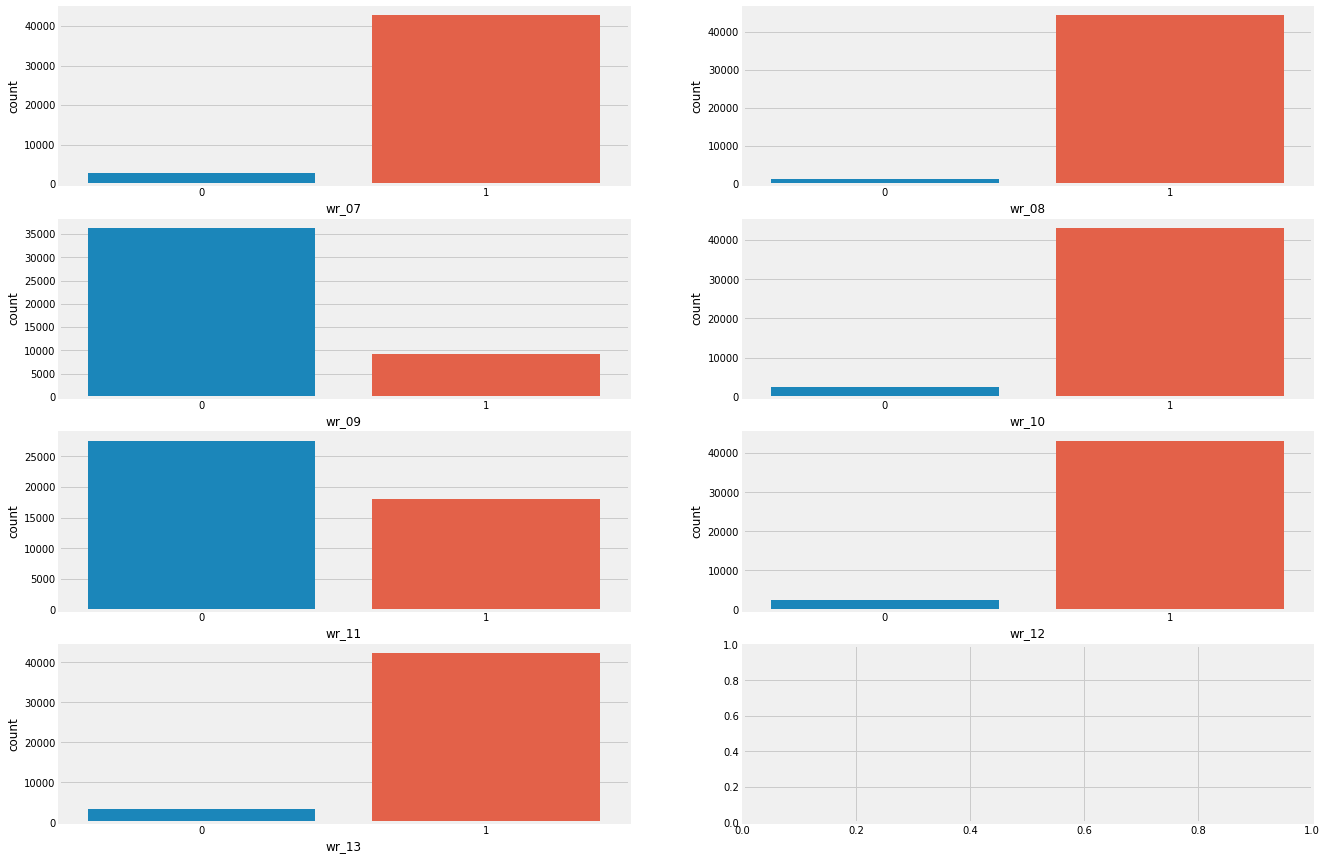

In [13]:
#wr07 ~ 13
f,ax=plt.subplots(4,2,figsize=(20, 15))  #plot field

sns.countplot('wr_07', data=data, ax=ax[0, 0])
sns.countplot('wr_08', data=data, ax=ax[0, 1])
sns.countplot('wr_09', data=data, ax=ax[1, 0])
sns.countplot('wr_10', data=data, ax=ax[1, 1])
sns.countplot('wr_11', data=data, ax=ax[2, 0])
sns.countplot('wr_12', data=data, ax=ax[2, 1])
sns.countplot('wr_13', data=data, ax=ax[3, 0])

plt.savefig("wr2.png")

0 : 모른다, 1 : 안다

#### 대체로 아는 단어
- wr_07
- wr_08
- wr_10
- wr_12
- wr_13

#### 대체로 모르는 단어
- wr_09
- wr_11

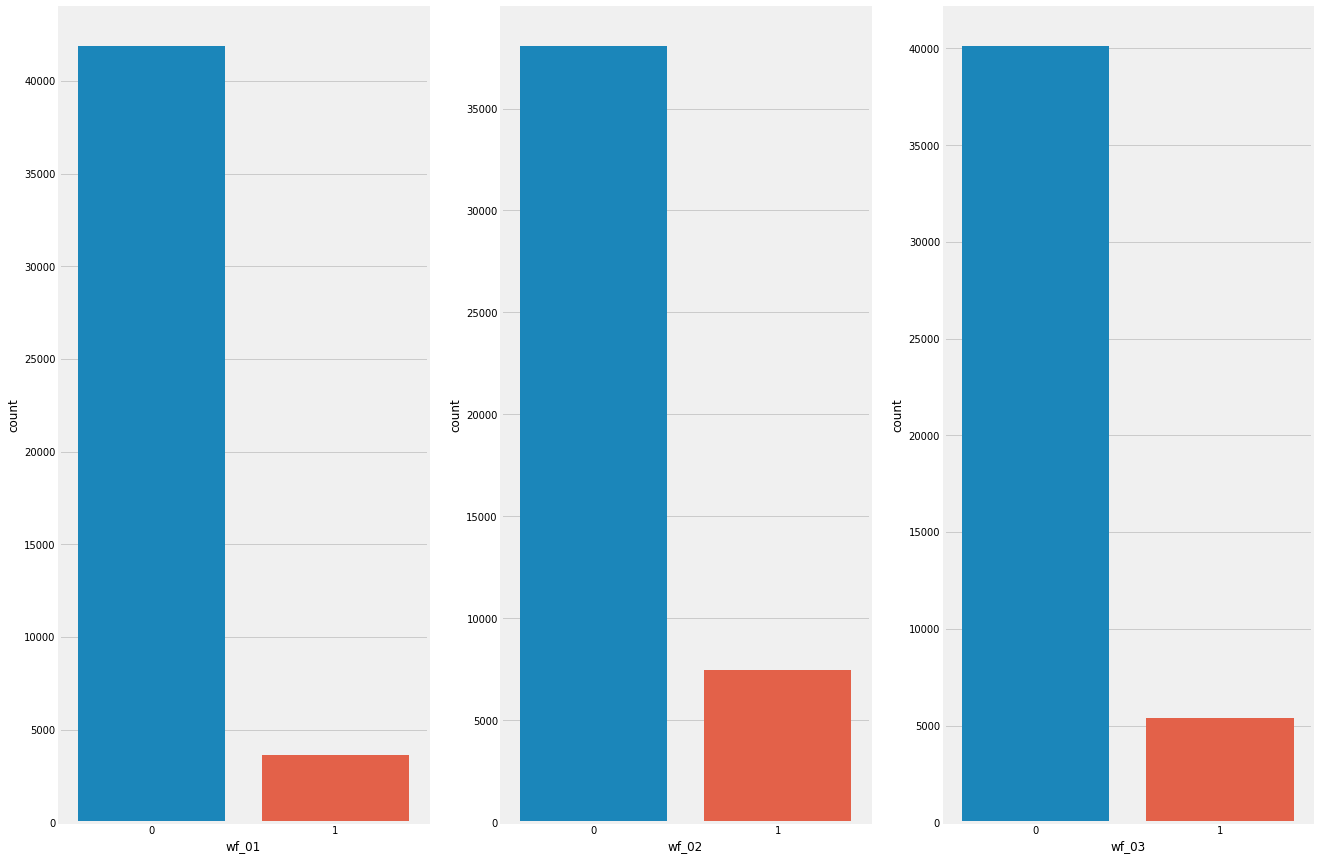

In [54]:
#wr07 ~ 13
f,ax=plt.subplots(1, 3,figsize=(20, 15))  #plot field

sns.countplot('wf_01', data=data, ax=ax[0])
sns.countplot('wf_02', data=data, ax=ax[1])
sns.countplot('wf_03', data=data, ax=ax[2])

---

In [77]:
data['wr_many'] = 0

for i in range(0, len(data)):
    sum = 0
    if data['wr_01'][i] == '1':
        sum += 1
    if data['wr_02'][i] == '1':
        sum += 1    
    if data['wr_04'][i] == '1':
        sum += 1
    if data['wr_05'][i] == '1':
        sum += 1
    if data['wr_07'][i] == '1':
        sum += 1
    if data['wr_08'][i] == '1':
        sum += 1
    if data['wr_10'][i] == '1':
        sum += 1
    if data['wr_12'][i] == '1':
        sum += 1
    if data['wr_13'][i] == '1':
        sum += 1
    
    data['wr_many'][i] = sum

In [78]:
data['wr_less'] = 0

for i in range(0, len(data)):
    sum = 0
    if data['wr_03'][i] == '1':
        sum += 1
    if data['wr_06'][i] == '1':
        sum += 1    
    if data['wr_09'][i] == '1':
        sum += 1
    if data['wr_11'][i] == '1':
        sum += 1
    
    data['wr_less'][i] = sum

In [79]:
data['wf_know'] = 0

for i in range(0, len(data)):
    sum = 0
    if data['wf_01'][i] == '1':
        sum += 1
    if data['wf_02'][i] == '1':
        sum += 1    
    if data['wf_03'][i] == '1':
        sum += 1

    data['wf_know'][i] = sum

In [80]:
data

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,...,wr_13,Mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op,wr_many,wr_less,wf_know
0,3,1,0,4.0,0,0,3,6,10,0,...,1,2.95,3.0,3.484417,4.5,2.0,4.0,7,0,0
1,2,3,1,3.0,0,0,1,1,7,2,...,1,2.60,4.0,2.500000,5.5,3.5,5.0,8,0,0
2,3,2,0,3.0,1,0,2,6,10,1,...,1,1.90,4.5,4.000000,6.0,5.5,3.5,9,1,1
3,2,3,1,0.0,0,0,1,1,7,2,...,1,3.35,4.0,5.000000,4.5,3.5,4.5,5,0,0
4,2,2,0,2.0,1,0,2,6,0,0,...,1,3.00,4.0,4.000000,6.0,5.5,6.5,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45524,1,1,0,1.0,0,2,1,6,8,2,...,1,4.15,6.0,3.000000,0.5,1.0,4.5,9,1,1
45525,3,1,0,2.0,1,0,1,6,1,0,...,1,3.80,4.0,3.000000,4.5,4.5,5.5,9,2,1
45526,1,1,0,1.0,0,0,1,6,5,1,...,1,1.50,2.0,5.500000,3.5,5.0,6.5,9,0,0
45527,4,3,0,2.0,1,2,1,6,1,1,...,1,2.90,3.5,3.000000,4.5,4.5,5.5,9,1,0


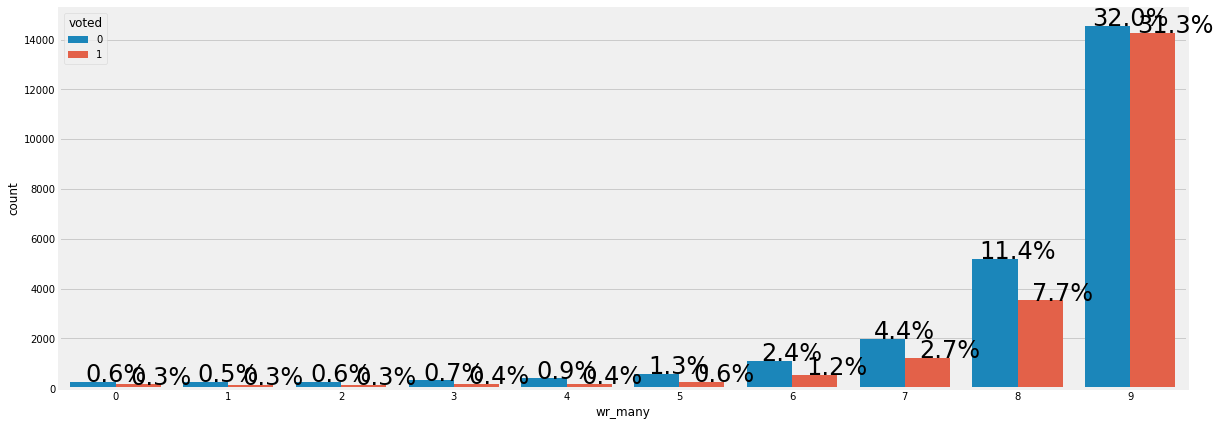

In [81]:
ax = sns.countplot('wr_many',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

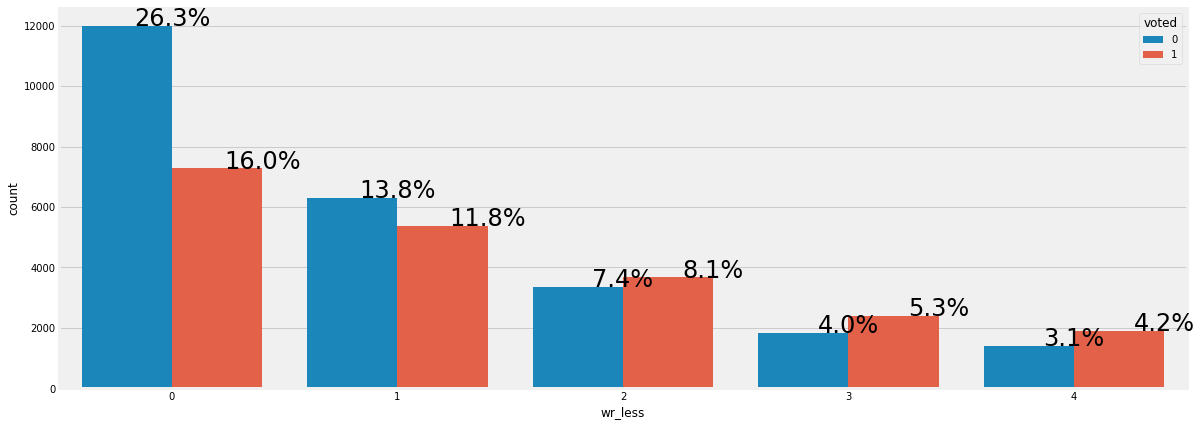

In [86]:
ax = sns.countplot('wr_less',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

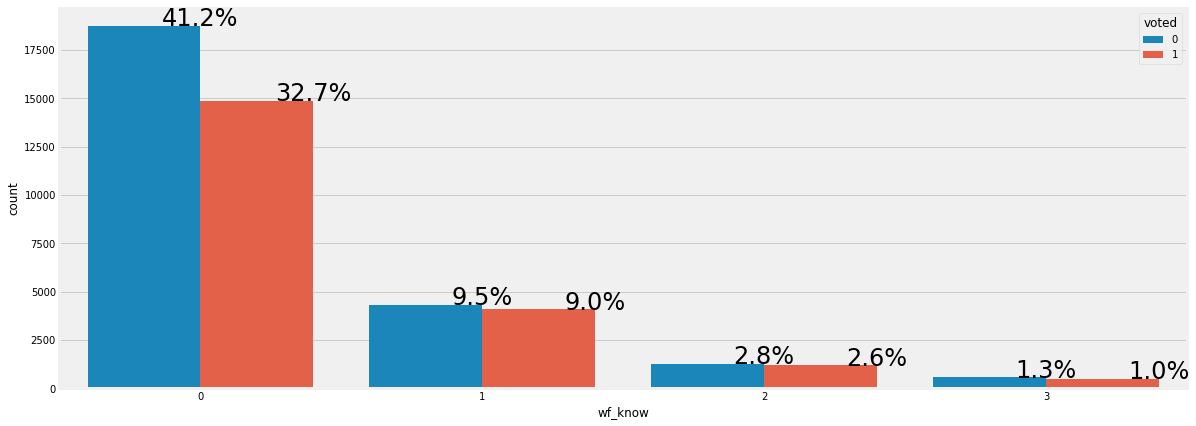

In [89]:
ax = sns.countplot('wf_know',hue='voted',data=data)

total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y) ,ha='center', size = 24)
plt.show()

In [91]:
word = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 
        'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'wf_01', 'wf_02', 'wf_03']

data.drop(word, axis=1, inplace=True)

In [92]:
data

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,voted,Mach_score,tp_ex,tp_ag,tp_co,tp_em,tp_op,wr_many,wr_less,wf_know
0,3,1,0,4.0,0,0,3,6,10,0,0,2.95,3.0,3.484417,4.5,2.0,4.0,7,0,0
1,2,3,1,3.0,0,0,1,1,7,2,0,2.60,4.0,2.500000,5.5,3.5,5.0,8,0,0
2,3,2,0,3.0,1,0,2,6,10,1,1,1.90,4.5,4.000000,6.0,5.5,3.5,9,1,1
3,2,3,1,0.0,0,0,1,1,7,2,1,3.35,4.0,5.000000,4.5,3.5,4.5,5,0,0
4,2,2,0,2.0,1,0,2,6,0,0,1,3.00,4.0,4.000000,6.0,5.5,6.5,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45524,1,1,0,1.0,0,2,1,6,8,2,0,4.15,6.0,3.000000,0.5,1.0,4.5,9,1,1
45525,3,1,0,2.0,1,0,1,6,1,0,0,3.80,4.0,3.000000,4.5,4.5,5.5,9,2,1
45526,1,1,0,1.0,0,0,1,6,5,1,1,1.50,2.0,5.500000,3.5,5.0,6.5,9,0,0
45527,4,3,0,2.0,1,2,1,6,1,1,1,2.90,3.5,3.000000,4.5,4.5,5.5,9,1,0
